In [1]:
#Líneas a incluir en el documento .tex para eliminar la primera hoja (innecesaria porque el título en formato aparece en la segunda)
#\usepackage{atbegshi}
#\AtBeginDocument{\AtBeginShipoutNext{\AtBeginShipoutDiscard}}

\let\firstpage\relax

\makeatletter
\begin{center}

\begin{titlepage}

{\includegraphics[width=0.2\textwidth]{usblogo.png}\par} 
	{\bfseries\scshape\LARGE Universidad Simón Bolívar \par}
	{\scshape\large Dpto. de Tecnología y Electrónica \par}
	{\scshape\large EC7817 - Tópico especial II - Inteligencia Artificial en Biomédica \par}
    \vspace{0.2cm}

{\bfseries\scshape\LARGE \@title \par}

\vspace{0.2cm}
Autor: \@author

Profesor: Miguel Altuve

\vspace{0.2cm}

\@date

\let\newpage\relax	

\end{titlepage}

\end{center}

\makeatother


\vspace{1cm} \section*{\scshape\Large Introducción}

Utilice el conjunto de datos flor Iris (Iris flower) disponible en https://archive.ics.uci.edu/ml/datasets/iris para estudiar clasificación multi-clase usando redes neuronales artificiales. Esta es quizás la base de datos más conocida que se encuentra en la literatura de aprendizaje automático.
La base de datos contiene:
\begin{itemize}
    \item[$\bullet$] 150 instancias, 50 instancias de cada tipo de flor (setosa, virginica y versicolor).
    \item[$\bullet$] 4 atributos: largo de sépalo (cm), ancho de sépalo (cm), largo de pétalo (cm) y ancho de pétalo (cm).
    \item[$\bullet$] 3 clases: setosa, virginica y versicolor. La clase setosa es linealmente separable de las otras dos, pero las clases virginica y versicolor no son linealmente separables entre sí.
\end{itemize}
El objetivo del taller es utilizar redes neuronales artificiales para asignar cada observación al tipo apropiado de flor, a partir de un conjunto de atributos (predictores).
Pueden leer este artículo para conocer un poco más sobre la base de datos: Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. Annals of human genetics, 7(2), 179-188.
(4 puntos) Estadísticas descriptivas de los datos
\begin{itemize}
    \item[$\bullet$] Describa estadísticamente el conjunto de observaciones.
    \item[$\bullet$] Obtenga los histogramas de las variables de entrada y analice si las observaciones provienen de una población con una distribución normal (Gaussiana).
    \item[$\bullet$] Obtenga los diagramas de dispersión por grupo.
    \item[$\bullet$] Examine la dependencia entre las variables de entrada a partir del coeficiente de correlación de Pearson.
\end{itemize}
(4 puntos) Redes neuronales artificiales (RNA)
A continuación se describen una serie de tareas. Estas tareas no son pasos a seguir, por lo tanto, no son secuenciales:
\begin{itemize}
    \item[$\bullet$] Obtenga un modelo de RNA que permita clasificar la variable de salida (tipo de flor) a partir de los cuatro atributos iniciales.
    \item[$\bullet$] Obtenga un modelo de RNA que permita clasificar la variable de salida (tipo de flor) a partir de ocho atributos: los cuatro iniciales y el cuadrado de cada atributo. 
    \item[$\bullet$] Realice una validación cruzada de 5 iteraciones (5-fold cross-validation). Reporte la matriz de contingencia de cada iteración y los valores de F1MACRO de cada iteración y su promedio (valor final), tanto en el entrenamiento como en la prueba.
    \item[$\bullet$] Concluya sobre el taller.
\end{itemize}
(2 punto) Evolución de las redes neuronales artificiales
\begin{itemize}
    \item[$\bullet$] Escriba sobre el proceso de evolución de las redes neuronales artificiales, desde su inicio hasta nuestros días. Comente sobre los distintos tipos de redes que se han creado y mencione algunos ejemplos exitosos en este proceso evolutivo. Max 2 páginas.
\end{itemize}
(1 Extra) Redes neuronales artificiales para regresión
\begin{itemize}
    \item[$\bullet$] Utilice el conjunto de datos oreja de mar (Abalone).
    \item[$\bullet$] Divida la base de datos en 50%, seleccionando los datos de manera aleatoria.  
    \item[$\bullet$] Utilice un modelo de regresión lineal y una red neuronal artificial para predecir la edad de los abalones.
    \item[$\bullet$] Entrene sobre el 50% y pruebe sobre el 50% restante (no use validación cruzada).
    \item[$\bullet$] Utilice los mismos atributos para cada modelo: regresión lineal y RNA.
    \item[$\bullet$] Reporte el valor RSS, tanto en el entrenamiento como en la prueba.
    \item[$\bullet$] ¿Cuál modelo predice mejor la edad del abalón? Explique
\end{itemize}
(1 Extra) Redes neuronales artificiales para clasificación binaria
\begin{itemize}
    \item[$\bullet$] Utilice el conjunto de datos cáncer de mama (breast cancer).
    \item[$\bullet$] Divida la base de datos en 50%, seleccionando los datos de manera aleatoria. 
    \item[$\bullet$] Utilice un modelo de regresión logística y una red neuronal artificial para clasificar una observación como cáncer benigno o maligno.
    \item[$\bullet$] Entrene sobre el 50% y pruebe sobre el 50% restante (no use validación cruzada).
    \item[$\bullet$] Utilice los mismos atributos para cada modelo: regresión logística y RNA.
    \item[$\bullet$] Reporte el valor F1, tanto en el entrenamiento como en la prueba.
    \item[$\bullet$] ¿Cuál modelo clasifica mejor el cáncer? Explique
\end{itemize}


In [337]:

# Se instancian las bibliotecas a implementar

import numpy as np
#import csv
#import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
#import statistics as stats

import scipy
from scipy import stats
#from scipy.stats import boxcox
#from scipy.special import inv_boxcox

import sklearn
import sklearn.model_selection as sklms
import sklearn.linear_model as skllm
import sklearn.metrics as sklmt
import sklearn.neural_network as sklnn
#from sklearn import cross_validation
#import sklearn.cross_validation as sklcv 
#from sklearn.neural_network import MLPClassifier
#from sklearn.model_selection import train_test_split

from prettytable import PrettyTable

#format of print for numpy float
np.set_printoptions(precision = 5, formatter = {'float_kind': lambda x: "{0:0.5f}".format(x)}, threshold = 40, edgeitems = 20)


In [3]:

# Configuration to display center plots

from IPython.core.display import HTML

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")



\vspace{1cm}
\subsection*{\scshape\large Funciones implementadas a lo largo del código}


In [4]:

# presentar datos de la data

def printDataInfo(data, name):
    print('Tamaño de la data ' + name)
    print('Cantidad de muestras: ', np.size(data,0))
    print('Número de Atriutos de cada muestra: ', np.size(data,1))


#endfunction


In [5]:

# Cálculo de los Parámetros estadísticos de interés

def StatsVars( data, title ):
    

    # Inicialización

    data_Mean = np.zeros((np.size(data,1),1))       #media
    data_Median = np.zeros((np.size(data,1),1))     #mediana
    data_Mode = np.zeros((np.size(data,1),1))       #moda
    data_Max = np.zeros((np.size(data,1),1))        #máximo
    data_Min = np.zeros((np.size(data,1),1))        #mínimo
    data_Range = np.zeros((np.size(data,1),1))      #rango
    data_Desv = np.zeros((np.size(data,1),1))       #desviación
    data_Skew = np.zeros((np.size(data,1),1))       #asimetría
    data_Kurt = np.zeros((np.size(data,1),1))       #curtosis
    

    # cálculo de los parámetros estadísticos

    data_Mean = np.mean(data, axis = 0)
    data_Median = np.median(data, axis = 0)
    data_Mode = stats.mode(data, axis = 0)
    data_Max = np.max(data, axis = 0)
    data_Min = np.min(data, axis = 0)
    data_Range = data_Max - data_Min
    data_Desv = np.std(data, axis = 0)
    data_Skew = stats.skew(data, axis = 0, bias = 0)
    data_Kurt = stats.kurtosis(data, axis = 0, bias = 0)
    
    # Se inserta el formato de presentación de los datos
    np.set_printoptions(formatter={'float': lambda x: "{:.5e}".format(x)}, suppress= True)
    
    # Presentación de los valores de los parámetros estadísticos estudiados

    print('la media de los atributos para la ' + title + ' es:');
    print(data_Mean);
    print();
    print('la mediana de los atributos para la ' + title + ' es:');
    print(data_Median);
    print();
    print('la moda de los atributos para la ' + title + ' es:');
    print(data_Mode);
    print();
    print('el valor máximo de los atributos para la ' + title + ' es:');
    print(data_Max);
    print();
    print('el valor mínimo de los atributos para la ' + title + ' es:');
    print(data_Min);
    print();
    print('lel rango de los atributos para la ' + title + ' es:');
    print(data_Range);
    print();
    print('la desviación estándar de los atributos para la ' + title + ' es:');
    print(data_Desv);
    print();
    print('la asimetría de los atributos para la ' + title + ' es:');
    print(data_Skew);
    print();
    print('el curtosis de los atributos para la ' + title + ' es:');
    print(data_Kurt);
    print();

    
    # retorna las variables estadísticas de interés
    
    return data_Mean, data_Median, data_Mode, data_Max, data_Min, data_Range, data_Desv, data_Skew, data_Kurt;

#endfunction
    

In [6]:

# Plot de los histogramas de cada atributo por separado

def histogrmAllAtriSep( data, varnames, title ):

    # Se muestran los histogramas

    for i in range( np.size(data,1) ):

        # Atributo i
        #print( title + " - Atributo " + str(i+1)+": " + varnames[i] + ' de la célula '+ str(int(np.floor(i/10)) + 1) )
        fig = plt.figure(figsize =(10, 2))
        
        #gráficos de histogramas
        plt.hist( data[:,i] , bins = 'auto' , color = 'm');
        plt.title( title + '\nHistograma del atributo '+ str(i+1) + ': ' + varnames[i] + ' de la célula '+ str(int(np.floor(i/10)) + 1) );

        # Add x, y gridlines
        plt.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.35)
        
        # y axis configuration
        plt.yticks( np.arange(0, np.max (plt.yticks()[0]), 10 ) )
        
        # plot
        plt.show()

    #endfor
    
#endfunction


In [7]:

# Scatter Plot de los atributos respecto a un atributo (atributo de salida)

def ScatterPlotAllto1Sep( data, varnames, title ):

    # Scatter plot de los atributos de entrada vs el atributo de salida

    for i in range( np.size(data[:,1:],1) ):
        
        # inicializa la figura
        fig = plt.figure(figsize = (10, 1.25))
        
        # scatter plot
        plt.scatter( data[:, i+1] , data[:, 0] , color = 'g')
        
        # title & labels
        plt.title( title + "\n" + varnames[0] + " VS Atributo " + str(i+1)+": " + varnames[i+1] + ' de la célula '+ str(int(np.floor(i/10)) + 1))
        plt.xlabel("Atributo " + str(i+1)+": " + varnames[i+1])
        plt.ylabel('Diagnóstico')
        
        # plot
        plt.show()
    
    #endfor
    
#endfunction


In [8]:

# Plot para una sola correlación de las datos (los atributos de entrada respecto al atributo de salida.)

def barPlotSimp( corr_data , varnames , title ):
    
    # Bar Plot de la correlación de los atributos

    #Figure size
    fig, ax = plt.subplots(figsize = (12, 4))

    # Bar Plot
    ax.bar(list(varnames[1:]), list(corr_data), width = 0.75, color='c');

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

    # Add x, y gridlines
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.35)

    # Add annotation to bars
    j = 0
    for i in ax.patches:
        plt.text(i.get_x() + 0.2, i.get_y() + np.round( np.max( corr_data ), 1 ) + 0.1, str( np.round( corr_data[j] , 5 ) ), fontsize = 10, fontweight ='bold', color ='black');
        j = j + 1

    # Plot title
    ax.set_title( title  + ' - Nivel de Correlación entre los atributos con el atributo ' + varnames[0])

    # axis labels
    #plt.xticks(np.arange( np.size(varnames[1:11],0) ), varnames[1:11])
    plt.xticks( varnames[1:] )

    # y axis configuration
    ax.set_yticks( np.arange( np.round(np.min(corr_data)-0.05,1), 1.25, 0.1 ) )
    ax.set_ylabel('Correlación con el atributo '+varnames[0])
    ax.set_xlabel('Atributos de entrada')

    #fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12, color ='grey', ha ='right', va ='bottom', alpha = 0.7)

    # plot
    plt.show()

#endfunction


In [9]:

# Plot para una sola correlación de las datos (los atributos de entrada respecto al atributo de salida.)

def barPlot_1Corr( corr_data , varnames , title ):
    
    # Bar Plot de la correlación de los atributos

    #Figure size
    fig, ax = plt.subplots(figsize = (16, 5))

    barWidth = 0.3

    # Set position of bar on X axis
    br1 = np.arange(np.size(corr_data[0:10]))
    br2 = br1 +  barWidth * np.ones(np.size(br1,0))
    br3 = br2 +  barWidth * np.ones(np.size(br1,0))

    # Bar Plot
    ax.bar(br1, list(corr_data[0:10] ), width =  barWidth, color='red',   label ='Célula 1');
    ax.bar(br2, list(corr_data[10:20]), width =  barWidth, color='green', label ='Célula 2');
    ax.bar(br3, list(corr_data[20:30]), width =  barWidth, color='blue',  label ='Célula 3');

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 1)
    ax.yaxis.set_tick_params(pad = 1)

    # Add x, y gridlines
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.35)

    # Add annotation to bars
    #j = 0
    #for i in ax.patches:
    #    plt.text(i.get_x() + 0.0, i.get_y() + np.round( np.max( corr_file_wdbc2[1:,1] ), 1 ) + 0.06, str( np.round( corr_file_wdbc2[j,1] , 1) ), fontsize = 10, fontweight ='bold', color ='black');
    #    j = j + 1

    # Plot title
    ax.set_title( title  + ' - Nivel de Correlación entre los atributos con el atributo ' + varnames[0])

    # axis labels
    #plt.xticks(np.arange( np.size(varnames[1:11],0) ), varnames[1:11])
    plt.xticks( br2, varnames[1:11] )

    # y axis configuration
    #ax.set_ylim( [-0.4, 1.1] )
    ax.set_yticks( np.arange(-0.4, 1.1, 0.1) )
    ax.set_ylabel('Correlación con el atributo '+varnames[0])
    ax.set_xlabel('Atributos de entrada')

    #fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12, color ='grey', ha ='right', va ='bottom', alpha = 0.7)

    # plot
    plt.legend()
    plt.show()

#endfunction


In [10]:

# Plot para una sola correlación de las datos (los atributos de entrada respecto al atributo de salida.)

def barPlot_1Corr_forAll( corr_data , varnames , title, j, i, barWidth, br1, br2, br3 ):
    
    # Bar Plot de la correlación de los atributos

    #Figure size
    fig, ax = plt.subplots(figsize = (16, 2.85))

    #barWidth = 0.3

    # Set position of bar on X axis
    #br1 = np.arange(np.size(corr_data[1:11]))
    #br2 = br1 +  barWidth * np.ones(np.size(br1,0))
    #br3 = br2 +  barWidth * np.ones(np.size(br1,0))

    # Bar Plot
    ax.bar(0,   corr_data[0]          , width =  barWidth*2, color='magenta', label ='Diagnóstico');
    ax.bar(br1, list(corr_data[1:11] ), width =  barWidth  , color='red',     label ='Célula 1');
    ax.bar(br2, list(corr_data[11:21]), width =  barWidth  , color='green',   label ='Célula 2');
    ax.bar(br3, list(corr_data[21:31]), width =  barWidth  , color='blue',    label ='Célula 3');

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 1)
    ax.yaxis.set_tick_params(pad = 1)

    # Add x, y gridlines
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.35)

    # Add annotation to bars
    #j = 0
    #for i in ax.patches:
    #    plt.text(i.get_x() + 0.0, i.get_y() + np.round( np.max( corr_file_wdbc2[1:,1] ), 1 ) + 0.06, str( np.round( corr_file_wdbc2[j,1] , 1) ), fontsize = 10, fontweight ='bold', color ='black');
    #    j = j + 1

    # Plot title
    ax.set_title( title  + '\nNivel de Correlación entre los atributos con el atributo ' + varnames[j] )

    # axis labels
    plt.xticks( np.hstack( (0, br2) ), varnames[0:11] )

    # y axis configuration
    #ax.set_ylim( [-0.5, 1.1] )
    ax.set_yticks( np.arange(-0.5, 1.1, 0.1) )
    ax.set_ylabel('Correlación con el atributo '+varnames[j])
    ax.set_xlabel('Atributos de entrada')

    #fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12, color ='grey', ha ='right', va ='bottom', alpha = 0.7)

    # plot
    plt.legend()
    plt.show()

#endfunction


def barPlot_AllCorr( corr_data , varnames , title ):

    barWidth = 0.3

    # Set position of bar on X axis
    br1 = np.arange(np.size(corr_data[1:11,0],0)) + 1
    br2 = br1 +  barWidth * np.ones(np.size(br1,0))
    br3 = br2 +  barWidth * np.ones(np.size(br1,0))
    
    for i in range( np.size(corr_data,1) ):
        
        # Se define la posición del atributo actual
        aux = np.copy(corr_data[:,i]) 
        j = np.where( aux == 1.0 )[0][0]
        #j = np.sum( (aux == 1.0) * np.arange( np.size(aux) ) )   # cálculo manual del índice
        
        # Se genera el plot de las correlaciones respecto al i-ésimo atributo
        barPlot_1Corr_forAll( corr_data[:,i], varnames, title, j, i, barWidth, br1, br2, br3 )
        
    #endfor

#endfunction


In [11]:

def IQRparamCalc( data ):

    # Obtención de variables de IQR

    dataQ1 = np.percentile(data, 25, axis = 0)
    dataQ2 = np.percentile(data, 50, axis = 0)
    dataQ3 = np.percentile(data, 75, axis = 0)

    dataIQR = stats.iqr(data, axis = 0)
    

    # Se inserta el formato de presentación de los datos
    np.set_printoptions(formatter={'float': lambda x: "{:.5e}".format(x)}, suppress= True)
    
    #Presentación de los parámetros IQR

    print('Q1 de los atributos es:');
    print(dataQ1);
    print();
    print('Q2 de los atributos es:');
    print(dataQ2);
    print();
    print('Q3 de los atributos es:');
    print(dataQ3);
    print();
    print('IQR de los atributos es:');
    print(dataIQR);
    print();

    return dataQ1, dataQ2, dataQ3, dataIQR

#endfunction


In [12]:

def AtipValueRemv( data ):

    # Obtención de variables de IQR

    dataQ1 = np.percentile(data, 25, axis = 0)
    #dataQ2 = np.percentile(data, 50, axis = 0)
    dataQ3 = np.percentile(data, 75, axis = 0)

    dataIQR = stats.iqr(data, axis = 0)


    # Detector de valores atípicos por debajo del límite inferior
    aux1 = data < ( dataQ1 - 1.5 * dataIQR ) * np.ones( (np.size(data,0),np.size(data,1)) )
    aux1 = np.sum(aux1, axis = 1)

 
    # Detector de valores atípicos por encima del límite supeior
    aux2 = data > ( dataQ3 + 1.5 * dataIQR ) * np.ones( (np.size(data,0),np.size(data,1)) )
    aux2 = np.sum(aux2, axis = 1)


    # Extracción de las muestras con valores atípicos
    return np.copy(data[ (aux1 == 0) & (aux2 == 0), :])

#endfunction


In [212]:

# BoxPlot de todos los atributos en una misma figura

def BoxPlotAllin1( data, varnames, title ):


    # Se inicializan los diagrama de bloques
    stats2 = cbook.boxplot_stats(data, labels = varnames)

    #fig, ax = plt.subplots(1, 1)
    fig = plt.figure(figsize =( 12, np.size( data,1 ) ))
    ax = fig.add_subplot(111)

    # Plot boxplots from our computed statistics
    bp = ax.bxp([stats2[i] for i in range( np.size(data,1) )], positions=range( np.size(data,1) ), patch_artist = True, vert = 0, shownotches ='True');


    colors = ['#0000FF', '#00FF00', '#FF0000', '#FF00FF', '#00FFFF', '#FFFF00', '#F0F0F0',
              '#0000FF', '#00FF00', '#FF0000', '#FF00FF', '#00FFFF', '#FFFF00', '#F0F0F0',
              '#0000FF', '#00FF00', '#FF0000', '#FF00FF', '#00FFFF', '#FFFF00', '#F0F0F0',
              '#0000FF', '#00FF00', '#FF0000', '#FF00FF', '#00FFFF', '#FFFF00', '#F0F0F0',
              '#0000FF', '#00FF00']

    
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        
    #endfor

    # changing color and linewidth of
    # whiskers
    for whisker in bp['whiskers']:
        whisker.set(color ='#8B008B',
                    linewidth = 2,
                    linestyle =":")
    #endfor

    # changing color and linewidth of
    # caps
    for cap in bp['caps']:
        cap.set(color ='#8B008B',
                linewidth = 1)
    #endfor

    # changing color and linewidth of
    # medians
    for median in bp['medians']:
        median.set(color ='#777777', 
                   linewidth = 1)
    #endfor

    # changing style of fliers
    for flier in bp['fliers']:
        flier.set(marker ='D',
                  color ='#e7298a',
                  alpha = 0.25)
    #endfor
    
    # Title
    ax.set_title(title + ' - Diagrama de Cajas (IQR)')

#endfunction



In [219]:

# Definición de la función de transformación Box-Cox para arreglos de 2D

def boxcox_transform( Data_array ):
    
    Data_lambdas = np.zeros( (np.size(Data_array,1)) )
    
    for i in range( np.size( Data_array, 1 ) ):
        Data_array[:, i], Data_lambdas[i] = stats.boxcox( Data_array[:, i] )
        
    #endfor
    
    # function results
    return Data_array, Data_lambdas

#endfunction


In [15]:

# Definición de la función de transformación Yoe-Johnson para arreglos de 2D

def yoejohnson_transform( Data_array , Lmbdas = None ):

    Data_lambdas = np.zeros( np.size( Data_array, 1 ) )
    
    if np.sum(Lmbdas) is None:
        for i in range( np.size( Data_array, 1 ) ):
            Data_array[:, i], Data_lambdas[i] = stats.yeojohnson( Data_array[:, i] )
        
        #endfor
        
    else:
        for i in range( np.size( Data_array, 1 ) ):
            Data_array[:, i]  = stats.yeojohnson( Data_array[:, i] , lmbda = Lmbdas[i] )
        
        #endfor
        Data_lambdas = Lmbdas
        
    #endif
    
    # function results
    return Data_array, Data_lambdas

#endfunction


In [16]:

# función para calcular el Residual Sum of Squares (RSS)

def RSS(y_real, y_calc):
    return np.sum ( ( y_real - y_calc ) * ( y_real - y_calc ) )

#endfunction


In [261]:

# Multi-Layer Perceptron: simplest Neural Network configuration & data-split

def MLPnnDSplit( data, trdSplit, varShuffle = False, randomState = None, HLayer = (10,), maxIter = 200, actvFn = 'relu', MLPsolver = 'adam' , stratifyData = None ):
    
    # Se instancian los data set de entrenamiento y evaluación
    X_train, X_test, y_train, y_test = sklms.train_test_split( data[:,1:], data[:,0], stratify = stratifyData, random_state = randomState, train_size = trdSplit )
    
    # Se instancia el modelo
    model = sklnn.MLPClassifier(hidden_layer_sizes = HLayer, max_iter = maxIter, activation = actvFn, solver = MLPsolver, random_state = randomState)
    
    # Variables de interés a almacenar
    #RSSent = np.zeros((1))
    #RSSeva = np.zeros((1))
    #R2ent = np.zeros((1))
    #R2eva = np.zeros((1))
    
    # Se entrena el modelo
    model.fit( X_train, y_train )
    
    # Se prueba el modelo (datos de entrenamiento: resultados del modelo)
    modelOutTrain = model.predict(X_train)

    # Evaluación de la predicción (datos de entrenamiento)
    RSSent = RSS( y_train , modelOutTrain )
    R2ent = model.score(X_train, y_train)     # Root Mean Square

    # Se prueba el modelo (datos de prueba: resultados del modelo entrenado)
    modelOutEval = model.predict(X_test)

    # Evaluación de la predicción (datos de prueba)
    RSSeva = RSS( y_test , modelOutEval )
    R2eva = model.score( X_test, y_test )     # Root Mean Square
    
    return RSSent , RSSeva , R2ent , R2eva , model
    
#endfunction


In [44]:

# Función para efectuar una red neuronal MLP con validación cruzada

def KFoldsCVMLPnn( data, Nsplits, varShuffle = False, randomState = None, HLayer = (10,), maxIter = 200, actvFn = 'relu', MLPsolver = 'adam' ):
    
    # Se inicializa el k-folds cross validation
    kfcv = sklms.KFold(n_splits = Nsplits, shuffle = varShuffle, random_state = randomState)
    
    # Se inicializa el modelo de Perceptrón Multivapa
    model = sklnn.MLPClassifier(hidden_layer_sizes = HLayer, max_iter = maxIter, activation = actvFn, solver = MLPsolver, random_state = randomState)
    
    
    # Variables de interés a almacenar
    RSSent = np.zeros((Nsplits))
    RSSeva = np.zeros((Nsplits))
    R2ent = np.zeros((Nsplits))
    R2eva = np.zeros((Nsplits))
    #R2CValScore = np.zeros((Nsplits, Nsplits))
    
    
    # Se generan los índices para separar los datos y se procede a predecir el modelo para cada set de datos
    #kfcv.split(data7N)
    
    
    i=0;   #contador

    for train_index, test_index in kfcv.split(data):
        #print("TRAIN:", train_index, "TEST:", test_index)

        # Inputs de entrenamiento y prueba
        X_train, X_test = data[train_index, 1:], data[test_index, 1:]

        # Outputs de entrenamiento y prueba
        y_train, y_test = data[train_index, 0], data[test_index, 0]

        # Se entrena el modelo
        model.fit(X_train, y_train)

        # Se prueba el modelo (datos de entrenamiento: resultados del modelo)
        modelOutTrain = model.predict(X_train)

        # Evaluación de la predicción (datos de entrenamiento)
        RSSent[i] = RSS( y_train , modelOutTrain )
        R2ent[i] = model.score(X_train, y_train)     # Root Mean Square

        # Se prueba el modelo (datos de prueba: resultados del modelo entrenado)
        modelOutEval = model.predict(X_test)

        # Evaluación de la predicción (datos de prueba)
        RSSeva[i] = RSS( y_test , modelOutEval )
        R2eva[i] = model.score( X_test, y_test )     # Root Mean Square

        #R2CValScore[i,:] = sklms.cross_val_score(model, X_test, y_test, cv = kfcv);

        # Se actualiza el contador
        i = i + 1;

    #for_end
    
    #return RSSent , RSSeva , R2ent , R2eva , R2CValScore , model;
    return RSSent , RSSeva , R2ent , R2eva , model;

#function_end


In [114]:

# R^2 del entrenamiento

def R2entPrint( R2ent, dataTitle ):
    
    if np.sum(R2ent) is not None:
        print(dataTitle + ': R^2 de cada iteración con los de entrenamiento:')
        print(R2ent)
        print('\n')

#endfunction


In [115]:

# RSS del entrenamiento

def RSSentPrint( RSSent, dataTitle ):
    
    if np.sum(RSSent) is not None:
        print(dataTitle + ': RSS de cada iteración con los datos de entrenamiento:')
        print(RSSent)
        print('\n')

#endfunction


In [116]:

# R^2 de la evaluación

def R2evaPrint( R2eva, dataTitle ):
    
    if np.sum(R2eva) is not None:
        print(dataTitle + ': R^2 de cada iteración con los datos de prueba:')
        print(R2eva)
        print('\n')

#endfunction


In [131]:

# R^2 de la evaluación

def RSSevaPrint( RSSeva, dataTitle ):
    
    if np.sum(RSSeva) is not None:
        print(dataTitle + ': RSS de cada iteración con los datos de prueba:')
        print(RSSeva)
        print('\n')

#endfunction


In [118]:

# R^2 usando la función cross_val_score

def R2evaCVSPrint( R2CValScore, dataTitle ):
    
    if np.sum(R2CValScore) is not None:
        print('error del modelo usando el comando cross_val_score:')
        print(R2CValScore)
        print('\n')

#endfunction


In [315]:

# presentar todos los errores resultados del modelo

def modelErrorPrint( dataTitle=None , RSSent=None , RSSeva=None , R2ent=None , R2eva=None , R2CValScore=None ):
    
    # formato de los errores
    np.set_printoptions(formatter={'float': lambda x: "{0:0.5f}".format(x)}, suppress = True)
    
    # errores de interés obtenidos
    RSSentPrint( RSSent, dataTitle )
    
    RSSevaPrint( RSSeva, dataTitle )
    
    R2entPrint( R2ent, dataTitle )
    
    R2evaPrint( R2eva, dataTitle )
    
    R2evaCVSPrint( R2CValScore, dataTitle )

#endfunction


In [251]:

# Linear Regression & data-split

def LinearRegrDSplit( data, trdSplit, varShuffle = False, randomState = None, stratifyData = None ):
    
    # Se instancian los data set de entrenamiento y evaluación
    Xtrain, Xtest, Ytrain, Ytest = sklms.train_test_split( data[:,1:], data[:,0], stratify = stratifyData, random_state = randomState, train_size = trdSplit )
    
    # Se instancia el modelo
    model = skllm.LinearRegression()
    
    # Variables de interés a almacenar
    #RSSent = np.zeros((1))
    #RSSeva = np.zeros((1))
    #R2ent = np.zeros((1))
    #R2eva = np.zeros((1))
    
    # Se entrena el modelo
    model.fit( Xtrain, Ytrain )
    
    # Se prueba el modelo (datos de entrenamiento: resultados del modelo)
    modelOutTrain = model.predict(Xtrain)

    # Evaluación de la predicción (datos de entrenamiento)
    RSSent = RSS( Ytrain , modelOutTrain )
    R2ent = model.score(Xtrain, Ytrain)     # Root Mean Square

    # Se prueba el modelo (datos de prueba: resultados del modelo entrenado)
    modelOutEval = model.predict(Xtest)

    # Evaluación de la predicción (datos de prueba)
    RSSeva = RSS( Ytest , modelOutEval )
    R2eva = model.score( Xtest, Ytest )     # Root Mean Square
    
    return RSSent , RSSeva , R2ent , R2eva , model
    
#endfunction


In [231]:

# Función para efectuar la regresión lineal con validación cruzada

def KFoldsCVLinearRegresion(data, Nsplits, varShuffle = False, randomState = None):
    
    # Se inicializa el k-folds cross validation
    kfcv = sklms.KFold(n_splits = Nsplits, shuffle = varShuffle, random_state = randomState)

    # Se obtienen los índices de los splits de data.
    #kfcv.get_n_splits(data7N)

    
    # Se inicializa el modelo a entrenar
    model = skllm.LinearRegression()
    
    
    # Variables de interés a almacenar
    betas = np.zeros((np.size(data,1) -1, Nsplits))
    RSSent = np.zeros((Nsplits))
    RSSeva = np.zeros((Nsplits))
    R2ent = np.zeros((Nsplits))
    R2eva = np.zeros((Nsplits))
    R2CValScore = np.zeros((Nsplits, Nsplits))
    
    
    # Se generan los índices para separar los datos y se procede a predecir el modelo para cada set de datos
    #kfcv.split(data7N)
    
    
    i=0;   #contador

    for train_index, test_index in kfcv.split(data):
        #print("TRAIN:", train_index, "TEST:", test_index)

        # Inputs de entrenamiento y prueba
        X_train, X_test = data[train_index, 1:], data[test_index, 1:]

        # Outputs de entrenamiento y prueba
        y_train, y_test = data[train_index, 0], data[test_index, 0]

        # Se entrena el modelo
        model.fit(X_train, y_train)

        # Se almacenan los coeficientes de la iteración
        betas[:,i] = model.coef_

        # Se prueba el modelo (datos de entrenamiento: resultados del modelo)
        modelOutTrain = model.predict(X_train)

        # Evaluación de la predicción (datos de entrenamiento)
        RSSent[i] = RSS( y_train , modelOutTrain )
        R2ent[i] = model.score(X_train, y_train)     # Root Mean Square

        # Se prueba el modelo (datos de prueba: resultados del modelo entrenado)
        modelOutEval = model.predict(X_test)

        # Evaluación de la predicción (datos de prueba)
        RSSeva[i] = RSS( y_test , modelOutEval )
        R2eva[i] = model.score( X_test, y_test )     # Root Mean Square

        R2CValScore[i,:] = sklms.cross_val_score(model, X_test, y_test, cv = kfcv);

        # Se actualiza el contador
        i = i + 1;


    #for_end
    
    return betas , RSSent , RSSeva , R2ent , R2eva , R2CValScore, model;

#function_end
    

In [252]:

# Logistic Regression & data-split

def LogisticRegrDSplit( data, trdSplit, varShuffle = False, randomState = None, stratifyData = None ):
    
    # Se instancian los data set de entrenamiento y evaluación
    Xtrain, Xtest, Ytrain, Ytest = sklms.train_test_split( data[:,1:], data[:,0], stratify = stratifyData, random_state = randomState, train_size = trdSplit )
    
    # Se instancia el modelo
    model = skllm.LogisticRegression()
    
    # Variables de interés a almacenar
    #RSSent = np.zeros((1))
    #RSSeva = np.zeros((1))
    #R2ent = np.zeros((1))
    #R2eva = np.zeros((1))
    
    # Se entrena el modelo
    model.fit( Xtrain, Ytrain )
    
    # Se prueba el modelo (datos de entrenamiento: resultados del modelo)
    modelOutTrain = model.predict(Xtrain)

    # Evaluación de la predicción (datos de entrenamiento)
    RSSent = RSS( Ytrain , modelOutTrain )
    R2ent = model.score(Xtrain, Ytrain)     # Root Mean Square

    # Se prueba el modelo (datos de prueba: resultados del modelo entrenado)
    modelOutEval = model.predict(Xtest)

    # Evaluación de la predicción (datos de prueba)
    RSSeva = RSS( Ytest , modelOutEval )
    R2eva = model.score( Xtest, Ytest )     # Root Mean Square
    
    return RSSent , RSSeva , R2ent , R2eva , model
    
#endfunction


In [233]:

# Función para efectuar la regresión lineal con validación cruzada

def KFoldsCVLogisticRegresion(data, Nsplits, varShuffle = False, randomState = None):
    
    # Se inicializa el k-folds cross validation
    kfcv = sklms.KFold(n_splits = Nsplits, shuffle = varShuffle, random_state = randomState)

    # Se obtienen los índices de los splits de data.
    #kfcv.get_n_splits(data7N)

    
    # Se inicializa el modelo a entrenar
    model = skllm.LogisticRegression()     #función de costo: l_2-norm
    
    
    # Variables de interés a almacenar
    betas = np.zeros((np.size(data,1) -1, Nsplits))
    RSSent = np.zeros((Nsplits))
    RSSeva = np.zeros((Nsplits))
    R2ent = np.zeros((Nsplits))
    R2eva = np.zeros((Nsplits))
    R2CValScore = np.zeros((Nsplits, Nsplits))
    
    
    # Se generan los índices para separar los datos y se procede a predecir el modelo para cada set de datos
    #kfcv.split(data7N)
    
    
    i=0;   #contador

    for train_index, test_index in kfcv.split(data):
        #print("TRAIN:", train_index, "TEST:", test_index)

        # Inputs de entrenamiento y prueba
        X_train, X_test = data[train_index, 1:], data[test_index, 1:]

        # Outputs de entrenamiento y prueba
        y_train, y_test = data[train_index, 0], data[test_index, 0]

        # Se entrena el modelo
        model.fit(X_train, y_train)

        # Se almacenan los coeficientes de la iteración
        betas[:,i] = model.coef_

        # Se prueba el modelo (datos de entrenamiento: resultados del modelo)
        modelOutTrain = model.predict(X_train)

        # Evaluación de la predicción (datos de entrenamiento)
        RSSent[i] = RSS( y_train , modelOutTrain )
        R2ent[i] = model.score(X_train, y_train)     # Root Mean Square

        # Se prueba el modelo (datos de prueba: resultados del modelo entrenado)
        modelOutEval = model.predict(X_test)

        # Evaluación de la predicción (datos de prueba)
        RSSeva[i] = RSS( y_test , modelOutEval )
        R2eva[i] = model.score( X_test, y_test )     # Root Mean Square

        R2CValScore[i,:] = sklms.cross_val_score(model, X_test, y_test, cv = kfcv);

        # Se actualiza el contador
        i = i + 1;


    #for_end
    
    return betas , RSSent , RSSeva , R2ent , R2eva , R2CValScore, model;

#function_end
    

In [330]:

# función para evaluar data en una iteración después de generar el modelo
def modelEvalPredict( model, data, title ):

    np.set_printoptions(precision = 5, formatter = {'float': lambda x: "{0.5f}".format(x)}, suppress = True)

    # modelo para toda la data
    model.Out_ = model.model_.predict( data[:,1:] )
    model.RSS_ = RSS( data[:, 0] , model.Out_ )
    model.R2_ = model.model_.score( data[:,1:] , data[:, 0] )

    # presentación de resultados
    modelErrorPrint( title, RSSeva = model.RSS_, R2eva = model.R2_ )

#endfunction


\vspace{1cm} \subsection*{\scshape\large Clases creadas}

In [19]:

# El objetivo de esta clase es añadirle atributos adicionales a los arreglos numpy de relevancia para el estudio
# como lo son las variables estadísticas de interés.

class StatsArr(np.ndarray):
    
    def __new__(cls, input_array, mean_=None, median_=None, mode_=None, max_=None, min_=None, range_=None, desv_=None, 
                skew_=None, kurt_=None, dataCorr_=None, Q1_=None, Q2_=None, Q3_=None, IQR_=None, TransfType_=None, 
                Lambdas_=None):
        # Input array is an already formed ndarray instance
        # We first cast to be our class type
        obj = np.asarray(input_array).view(cls)
        # add the new attribute to the created instance
        obj.mean_ = mean_
        obj.median_ = median_
        obj.mode_ = mode_
        obj.max_ = max_
        obj.min_ = min_
        obj.range_ = range_
        obj.desv_ = desv_
        obj.skew_ = skew_
        obj.kurt_ = kurt_
        obj.dataCorr_ = dataCorr_
        obj.Q1_ = Q1_
        obj.Q2_ = Q2_
        obj.Q3_ = Q3_
        obj.IQR_ = IQR_
        obj.Transftype_ = TransfType_
        obj.Lambdas_ = Lambdas_
        # Finally, we must return the newly created object:
        return obj
    
    #endfunction

    def __array_finalize__(self, obj):
        # see InfoArray.__array_finalize__ for comments
        if obj is None: return
        self.mean_   = getattr(obj, 'mean_', None)
        self.median_ = getattr(obj, 'median_', None)
        self.mode_   = getattr(obj, 'mode_', None)
        self.max_    = getattr(obj, 'max_', None)
        self.min_    = getattr(obj, 'min_', None)
        self.range_  = getattr(obj, 'range_', None)
        self.desv_   = getattr(obj, 'desv_', None)
        self.skew_   = getattr(obj, 'skew_', None)
        self.kurt_   = getattr(obj, 'kurt_', None)
        self.dataCorr_ = getattr(obj, 'dataCorr_', None)
        self.Q1_ = getattr(obj, 'Q1_', None)
        self.Q2_ = getattr(obj, 'Q2_', None)
        self.Q3_ = getattr(obj, 'Q3_', None)
        self.IQR_ = getattr(obj, 'IQR_', None)
        self.TransfType_ = getattr(obj, 'TransfType_', None)
        self.Lambdas_ = getattr(obj, 'Lambdas_', None)
        # We do not need to return anything
    
    #endfunction
    
#endclass

In [165]:

# Clase que almacena los datos de interés del modelo
class ModelsInfo:
    
    def __init__(self, model_=None, RSSent_=None, RSSeva_=None, R2ent_=None, R2eva_=None, Betas_=None, R2CValScore_=None, RSS_=None, R2_=None, Out_=None):
        
        self.model_ = model_
        self.RSSent_ = RSSent_
        self.RSSeva_ = RSSeva_
        self.R2ent_ = R2ent_
        self.R2eva_ = R2eva_
        self.Betas_ = Betas_
        self.R2CValScore_ = R2CValScore_
        self.RSS_ = RSS_
        self.R2_ = R2_
        self.Out_ = Out_
        
    #endfunction
    
#endclass


\newpage

\vspace{1cm}
\section{\scshape\large Evolución de las Redes Neuronales Artificiales a lo largo de la historia}

Las redes neuronales iniciaron en los primeros momentos del desarrollo de la inteligencia artificial y han ido evolucionando hasta nuestros días, y aún siguen en desarrollo y evolución. Entre los hitos más importantes de su historia, se encuentran:
\begin{itemize}
    \item[$\circ$] En 1943, McCulloch y Pitts publicaron “un cálculo lógico de las ideas inmanentes en la actividad nerviosa”. Documento que sentó las bases de las redes neuronales artificiales, además de intentar demostrar que un programa para la máquina de Turing puede ser implementado con una red finita de neuronas formales.
    \item[$\circ$] En 1949, el Psicólogo Donald Hebb fue el primero en explica los procesos del aprendizaje y cómo ocurría; fundamentos bajo el cual se guían muchos de los modelos de aprendizaje de las redes neuronales.
    \item[$\circ$] En 1951, Minsky y Edmonds desarrollan SNARC, la primera neuro-computadora compuesta por 40 neuronas informáticas que buscaban imitar una rata mientras se abre paso en un laberinto.
    \item[$\circ$] En 1957, Frank Rosenblatt creo el perceptrón, que es considerado la primera red neuronal artificial. Consiste en un conjunto de entradas binarias, que son multiplicadas por pesos y cuya suma de dichos productos produce una salida binaria que es 1 si supera un umbral.
    \item[$\circ$] En 1959, Widrow y Hoff crean ADALINE, red neuronal desarrollada para reconocer patrones binarios. Fue la primera red neuronal en implementarse en un problema real: filtros adaptativos para eliminar ecos en líneas telefónicas.
    \item[$\circ$] En 1965 se creo el primer perceptrón multicapa, siendo capaz de solucionar elementos no linealmente separables.
    \item[$\circ$] En 1967, Grossberg creó la red avalancha. Consistía en un conjunto de elementos discretos con actividad que varía con el tiempo que satisface ecuaciones diferenciales continuas, especializadas en reconocimiento continuo del habla y aprendizaje del movimiento de los brazos de un robot.
    \item[$\circ$] En 1969, Minsky y Papert demostraron matemáticamente que el Percetrón no era capaz de resolver problemas matemáticamente simples, tales como el aprendizaje de una función no lineal, lo que mostró lo débil que era. Esto fue un golpe muy duro para los modelos de redes neuronales en su tiempo.
    \item[$\circ$] En 1974, Paul Werbos desarrolló la idea básica del algoritmo de retropropagación (backpropagation), cuya idea se terminó de definir en 1985.
    \item[$\circ$] En 1977, Jame Anderson creó la red asociador lineal. Consistía en elementos integradores lineales (neuronal) que sumaban sus entradas. Este modelo se basa en el principio de que las conexiones entre neuronas son reforzadas cada vez que se activan.
    \item[$\circ$] En 1977, Grossberg presenta la teoría de resonancia adaptativa (TRA). Es una red neuronal que basa su funcionamiento en cómo el cerebro procesa información y describe una serie de modelos de redes neuronales que utilizan métodos de aprendizaje supervisado y no supervisado. Son capaces de simular la memoria a corto y a largo plazo.
    \item[$\circ$] En 1980 se desarrollan las neuronas sigmoides. Redes neuronales cuya entrada puede ser un valor real (continuo), en vez de uno binario (0 o 1). También aparecen las neuronas bias, que siempre suman 1, lo que permite solucionar diversas situaciones.
    \item[$\circ$] En 1980, Kunihiko Fukushima desarrolla un modelo neuronal para reconocer patrones visuales.
    \item[$\circ$] En 1980 se crean las redes Feedforward. Redes neuronales cuyas salidas de una capa son utilizadas como entradas para la próxima capa, lo que significa que no hay loop hacia atrás. Siempre se alimentan de valores hacia adelante.
    \item[$\circ$] En 1982, Kohonen presentó los mapas auto-organizados (SON, Self-Organizing Maps). Tipo de red que posee un aprendizaje no supervisado competitivo capaz de descubrir rasgos comunes, regularidades, correlaciones o categorías en los datos de entradas, e incorporarlos a una estructura interna de conexiones.
    \item[$\circ$] En 1985, Hopfield provocó el renacimiento de las redes neuronales con su libro: “computación neuronal de decisiones en problemas de optimización”.
    \item[$\circ$] En 1986 se define el algoritmo de aprendizaje de retropropagación (backpropagation), por Rumelhart y Hinton, lo que hizo posible entrenar redes de múltiples capaz de forma supervisada.
    \item[$\circ$] En 1989, Yann LeCun desarrolla las redes neuronales convolucionales.
    \item[$\circ$] En 1997 se presentan las redes LSTM (Long Short Term Memory). Redes neuronales cuya arquitectura permite conexiones hacia atrás entre sus capaz.
    \item[$\circ$] En 2000, Hinton y Salakhutdinov popularizan el término “Aprendizaje Profundo” gracias a su artículo en el que muestran cómo se puede pre-entrenar una red neuronal una capa a la vez.
    \item[$\circ$] En 2006 se presenta la red de creencia profunda (DBN, Deep Belief Network). Red que utiliza una asignación de pesos inteligente a través de un pre-entrenamiento no supervisado de las capas. Se considera el comienzo del Deep Learning.
    \item[$\circ$] En 2009 se crea NIPS (Neural Information Processing Systems). Un workshop sobre aprendizaje profundo para reconocimiento de voz, que descubre que con conjuntos de datos lo suficientemente grandes, las redes neuronales no requieren pre-entrenamiento.
    \item[$\circ$] En 2012, Google presenta un algoritmo de reconocimiento de patrones capaz de realizar tareas a nivel humano. El algoritmo de Google es capaz de identificar gatos.
    \item[$\circ$] En 2014 se generan las redes generativas antagónicas (GAN), que consisten en dos modelos de redes neuronales compitiendo en simultáneo.
    \item[$\circ$] En 2016 el algoritmo de Google DeepMind, AlphaGo, mapea el arte del complejo juego de tablero Go y vence al campeón mundial de Go.
    \item[$\circ$] En 2017 se adopta el Deep Learning como principal tecnología en diversas aplicaciones.
\end{itemize}

\newpage

\vspace{1cm}
\section{\scshape\large Información relevante de la base de datos}

In [207]:
# Se carga la data
data0 = np.loadtxt("iris.data", dtype = str, delimiter =",")
printDataInfo(data0, 'Data iris de Flores')

Tamaño de la data Data iris de Flores
Cantidad de muestras:  150
Número de Atriutos de cada muestra:  5


De acuerdo con la información de la data, los atributo que posee son:
\begin{enumerate}
    \item \; Longitud sepal en CM
    \item \; Ancho sepal en CM
    \item \; Longitud de pétalo en CM
    \item \; Ancho de pétalo en CM
    \item \; Clase:
    \begin{itemize}
        \item[$-$] \; Iris Setosa
        \item[$-$] \; Iris Versicolor
        \item[$-$] \; Iris Virginica
    \end{itemize}
\end{enumerate}
Además, cada clase corresponde a un 33.333% de las muestras de la data.

\vspace{1cm} \subsection{\bfseries\scshape\large Primer Procesamiento de la base de datos}

Lo Primero es transformar el atributo asociado a la clasificación de etiquetas a una variable numérica de naturaleza discreta para posteriormente convertir la data de cadena de caracteres a números para poder aplicar las siguientes metodologías de análisis y procesamiento.

Adicionalmente, para mantener una uniformidad y facilitar el código, se colocará la columna asociada al atributo de clasificación como la primera columna del arreglo.

La conversión de las etiquetas será la siguiente:
\begin{align*}
    &Iris \, Setosa \quad\;\;\;   \rightarrow \; 1 \\
    &Iris \, Versicolor \;        \rightarrow \; 2 \\
    &Iris \, Virginica \;\;\,     \rightarrow \; 3 \\
\end{align*}

In [22]:
# Se transforma la columna de clasificación en binario
data0[ data0[ : , -1 ] == 'Iris-setosa'     , -1 ] = 1
data0[ data0[ : , -1 ] == 'Iris-versicolor' , -1 ] = 2
data0[ data0[ : , -1 ] == 'Iris-virginica'  , -1 ] = 3

# Se convierte la data de String a Float
data0 = data0.astype(float)

# Se coloca la columna de clasificación en la primera posición
data0 = np.column_stack( (data0[:,-1], data0[:, :-1]) )

# Se instacia la data en un objeto para darle atributos adicionales al arreglo
data0_ = StatsArr( data0 )

In [23]:
# Se define un vector con los nombres de las variables
varnames = ['Clase', 'Longitud sepal [CM]', 'Ancho sepal [CM]', 'Longitud de pétalo [CM]', 'Ancho de pétalo [CM]']

Una vez concluido este primer pre-procesamiento, se realiza el análisis estadístico de las variables involucradas.

\vspace{1cm} \section{\bfseries\scshape\Large Análisis Estadístico de los datos}

En este caso, se procede a determinarlos valores de las variables de interés.

In [24]:
# Estudio estadístico de la data: variables estadísticas
data0_.mean_, data0_.median_, data0_.mode_, data0_.max_, data0_.min_, data0_.range_, data0_.desv_, data0_.skew_, data0_.kurt_ = StatsVars(data0_[1:], 'Data Iris de flores')

la media de los atributos para la Data Iris de flores es:
[2.00671e+00 5.84832e+00 3.05101e+00 3.77450e+00 1.20537e+00]

la mediana de los atributos para la Data Iris de flores es:
[2.00000e+00 5.80000e+00 3.00000e+00 4.40000e+00 1.30000e+00]

la moda de los atributos para la Data Iris de flores es:
ModeResult(mode=array([[2.00000e+00, 5.00000e+00, 3.00000e+00, 1.50000e+00, 2.00000e-01]]), count=array([[50, 10, 26, 14, 27]]))

el valor máximo de los atributos para la Data Iris de flores es:
[3.00000e+00 7.90000e+00 4.40000e+00 6.90000e+00 2.50000e+00]

el valor mínimo de los atributos para la Data Iris de flores es:
[1.00000e+00 4.30000e+00 2.00000e+00 1.00000e+00 1.00000e-01]

lel rango de los atributos para la Data Iris de flores es:
[2.00000e+00 3.60000e+00 2.40000e+00 5.90000e+00 2.40000e+00]

la desviación estándar de los atributos para la Data Iris de flores es:
[8.15098e-01 8.25809e-01 4.32042e-01 1.75374e+00 7.58733e-01]

la asimetría de los atributos para la Data Iris de flore

De los resultados obtenidos se puede apreciar que el conjunto de datos de cada atributo de cada muestra se encuentra dento 
del mismo orden de magnitud, $1e^0$. Esto es corroborado por los valores de la media, mediana, máximo y mínimo, que se mantienen dentro de ese orden, y también por la desviación estándar que, para casi todos los casos mantiene un orden de magnitud de $1e^{-1}$ (el mayor valor de desviación es de 1.76, que corresponde con una media de 3.76), lo que sugiere que la variación de valores de los atributos en las muestras se mantiene dentro del orden de magnitud de $1e^0$.

Por otro lado, los valores de asimetría tienen un orden de magnitud de $1e^{-1}$, por lo que la desviación de la distribución respecto al eje vertical que cruza por el valor central del rango de valores del atributo no debe ser muy alta. La asimetría de los atributos Longitud Sepal y Ancho Sepal es positiva, mientras que la Longitud de Pétalo y Ancho de Pétalo es negativo, lo que indica que dos distribuciones están inclinadas hacia la derecha y las otras dos hacia la izquierda. Adicionalmente, todos los atributos excepto Ancho Sepal tienen una curtosis negativa, del orden de $1e^0$, lo que indican que su distribución puede tener un comportamiento Platicúrtico, mientras que el atributo Ancho Sepal, cuya curtosis es positiva y del orden de $1e^{-1}$, lo que sugiere que la distribución puede tener una tendencia mesocúrtica.

Para tener una idea más clara del comportamiento de los datos, se procede a mostrar los histogramas de cada atributo.

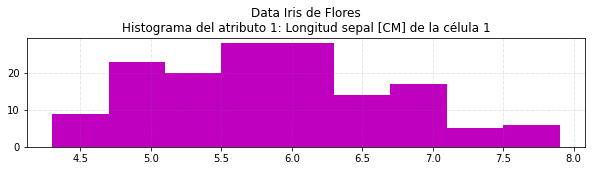

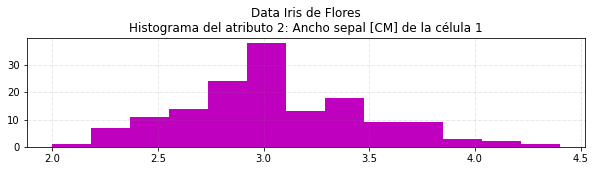

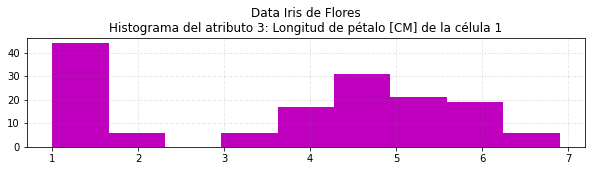

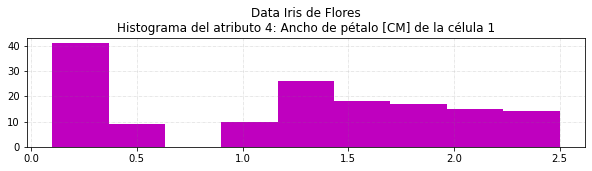

In [25]:
histogrmAllAtriSep(data0_[:,1:], varnames[1:], 'Data Iris de Flores')

De los resultados anteriores se aprecia claramente que los atributos Longitud de Pétalo y Ancho de Pétalo difieren en gran medida de un comportamiento gaussiano, mientras que los tributos Longitud Sepal y Ancho Sepal mantienen un mayor parentesco, pero no lo suficientemente cercano, por lo que será necesario realizar una transformación de los datos.

A continuación, se mostrará el comportamiento de todos los atributos con el atributo Clase a través de diagramas de dispersión.

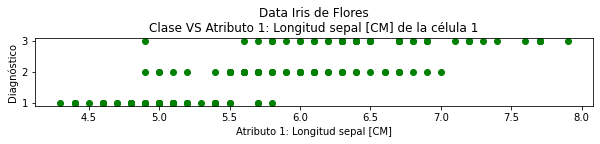

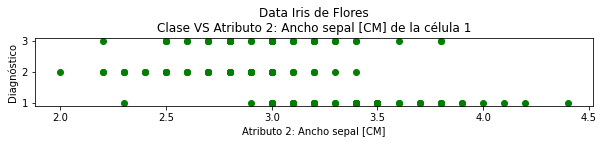

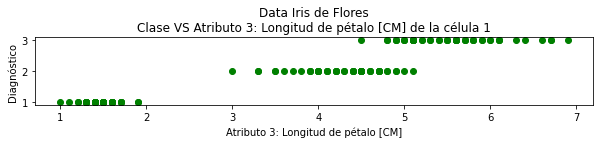

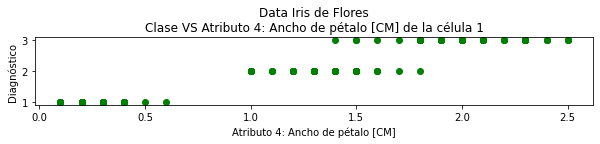

In [26]:
ScatterPlotAllto1Sep(data0_, varnames, 'Data Iris de Flores')

De los gráficos anteriores se aprecia una clara tendencia entre los atributos Longitud Sepal, Longitud de Pétalo y Ancho de Pétalo con la Clase: conforme aumenta el valor de alguno de estos atributos, se asocia directamente con un elemento de Clases (en este caso, para los valores seleccionados, de mayor magnitud). El atributo Ancho Sepal parece tener una relación más difusa con el atributo Clase.

Esto se puede observar estudiando la correlación entre cada atributo con el atributo Clase. Esto se Determina mediante la correlación de Pearson, cuya ecuación se presenta a continuación:
\begin{align*}
	r_{x,y} = \frac{ \sum_{i=0}^N{ {\sigma}_x {\sigma}_y } }{N}
\end{align*}


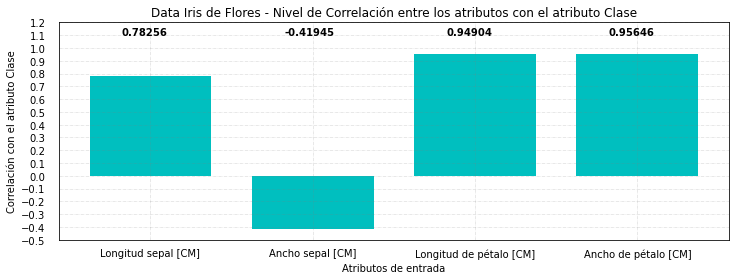

In [27]:
#correlación de Pearson
data0_.dataCorr_ = np.corrcoef(np.transpose(data0_))

# plot de la correlación
barPlotSimp(data0_.dataCorr_[1:,0], varnames, 'Data Iris de Flores')

De los gráficos de barra en los que se muestra el nivel de correlación de cada atributo con respecto al atributo Clase, se muestra que los atributos Longitud de Pétalo y Ancho de Pétalo poseen una correlación muy alta con el atributo Clase, mientras que la Longitud Sepal posee una correlación un poco menor, pero igual muy alta. Por otro lado, el atributo Ancho Sepal posee una anti-correlación baja respecto a los niveles de correlación de los demás atributos.

\vspace{1cm} \section{\bfseries\scshape\Large Procesamiento de la Data}

A continuación, se procede a implementar el procesamiento de los datos para (1) extraer los valores atípicos, (2) transformarlos para hacer que su comportamiento sea lo más similar a una gaussiana y (3) estandarizarlos.

\vspace{1cm} \subsection{\scshape\large Sustracción de valores atípicos}

Para la extracción de los valores atípicos, se implementará el criterio IQR. Un resumen del criterio se presenta en la siguiente figura
\begin{figure}
    \centering
    \includegraphics[width=0.4\textwidth]{IQR_Boxplot.png}
\end{figure}
Para tener una apreciación visual de la existencia de los valores atípicos, se procede a presentar los mismos en un gráfico.

In [28]:
data0_.Q1_, data0_.Q2_, data0_.Q3_, data0_.IQR_ = IQRparamCalc( data0_ )

Q1 de los atributos es:
[1.00000e+00 5.10000e+00 2.80000e+00 1.60000e+00 3.00000e-01]

Q2 de los atributos es:
[2.00000e+00 5.80000e+00 3.00000e+00 4.35000e+00 1.30000e+00]

Q3 de los atributos es:
[3.00000e+00 6.40000e+00 3.30000e+00 5.10000e+00 1.80000e+00]

IQR de los atributos es:
[2.00000e+00 1.30000e+00 5.00000e-01 3.50000e+00 1.50000e+00]



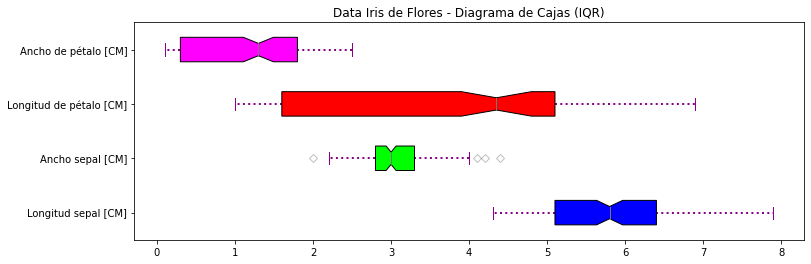

In [29]:
BoxPlotAllin1( data0_[:, 1:], varnames[1:], 'Data Iris de Flores')

Como se logra apreciar, son realmente bajos las muestras con valores atípicos presentes en la data (solo 4 según la figura anterior). A continuación, se proceden a remover dichas muestras.

In [213]:
data1 = AtipValueRemv( data0_ )
data1_ = StatsArr( data1 )

Con las muestras con valores atípicos removidas, se procede a transformar la data.

\vspace{1cm} \subsection{\scshape\large Transformación de la data}

Para esta experiencia, se escoge implementar la Transformación Yoe-Johnson, que resulta ser el equivalente de la transformación Box-Cox, pero para data de valores continuos no estrictamente positivos. su expresión matemática se presenta a continuación:
\begin{align*}
	u(x) = 
  \begin{cases} \begin{array}{l}
     \ln(x + 1) \quad $sí$ \quad  \lambda = 0 \;$\&$\; x > 0     \\[5pt]
     \frac{({(x + 1)}^{\lambda}-1)}{\lambda} \quad $sí$ \quad  \lambda \neq 0 \;$\&$\; x > 0     \\[5pt]
     -\ln(-x + 1) \quad $sí$ \quad  \lambda = 2 \;$\&$\; x < 0     \\[5pt]
     \frac{({(-x + 1)}^{2-\lambda}-1)}{2-\lambda} \quad $sí$ \quad  \lambda \neq 2 \;$\&$\; x < 0
  \end{array}	\end{cases}
\end{align*}
La transformada Yoe-Johnson resulta conveniente sobre la transformada Box-Cox debido a que uno de los atributos posee valores típicos iguales a cero, valor que resulta inadmisible para la transformada Box-Cox.

In [32]:
data1_.TransfType = 'Yoe-Johnsom Transform'
data1_[:,1:], data1_.Lambdas_ = yoejohnson_transform( data1_[:,1:] , Lmbdas = None )

Ahora se presentan los histogramas de los atributos transformados para apreciar el comportamiento actual de la distribución.

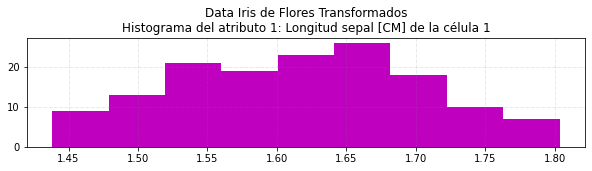

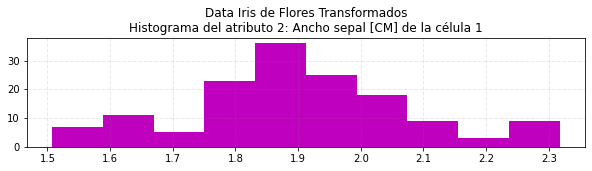

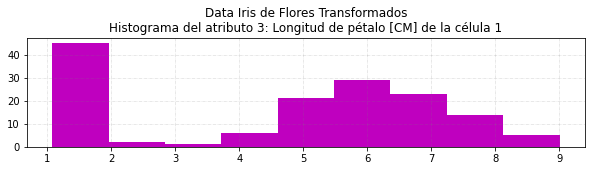

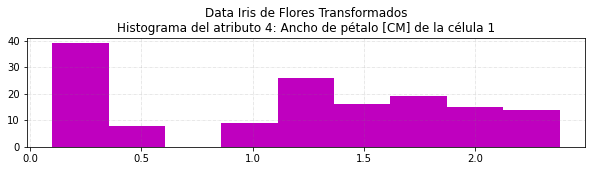

In [33]:
histogrmAllAtriSep(data1_[:,1:], varnames[1:], 'Data Iris de Flores Transformados')

Se ve una mejora apreciable en la data. Los atributos Longitud Sepal y Ancho Sepal tiene un comportamiento más cercano a una gaussiana. No obstante, los atributos Longitud de Pétalo y Ancho de Pétalo posee una gran cantidad de valores cuyo valor se encuentra en el extremo, al ser transformados, se mantienen en el extremo, mientras que el resto de valores adquiere un comportamiento de distribución gaussiana.

\vspace{1cm} \subsection{\scshape\large Estandarización de la data}

Si bien los datos se mantienen dentro de valores muy cercanos, con la finalidad de mantener un mismo rango de valores numéricos, se procede a estandarizar la data transformada. De esta forma, se evita posibles incrementos en desviaciones, diferencia entre medias y otros que pueden ser productos de la transformación realizada.

La metodología de estandarización a utilizar es Z-Score, cuya ecuación es:
\begin{align*}
    x_N = \frac{(x - \mu)}{ \sigma }
\end{align*}

In [34]:
# Normalización mediante Z-Score para todos los atributos.
data1n_ = np.copy( data1_ )
data1n_ = StatsArr( data1n_ )
data1n_[:,1:] = stats.zscore( data1n_[:,1:], axis = 0 )

A continuación, se presentan los histogramas de cada atributo normalizado.

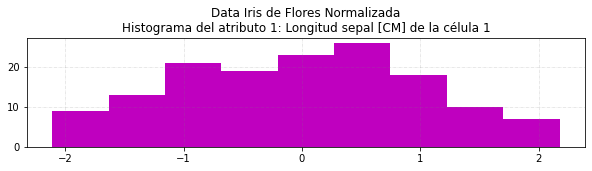

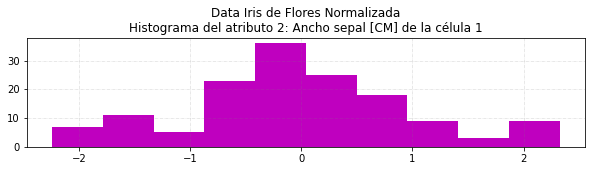

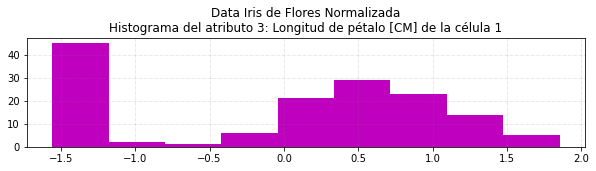

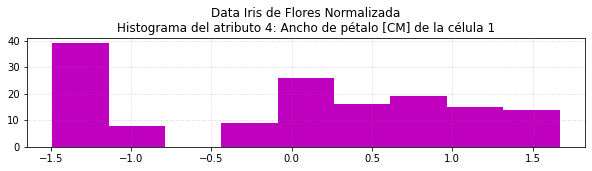

In [35]:
# Se grafica la distribución de los atributos normalizados
histogrmAllAtriSep( data1n_[:, 1:] , varnames[1:] , 'Data Iris de Flores Normalizada' )

Con la normalización, el dominio de los atributos no sobrepasa el rango $[-2.4, 2.4]$. Una vez estandarizados los datos, se procede a implementar los modelos de clasificación.

\vspace{1cm} \section{\bfseries\scshape\Large Modelo de redes neuronales}

En este trabajo se implementarán varios modelos de Perceptrón Multi-Capa (MLP, por sus siglas en inglés. El modelo de red neuronal más simple), todos con una sola capa oculta (hidden layer). Cada modelo presentará variaciones en la capa oculta en términos de número de neuronas y funciones de activación de todas las neuronas.

Adicionalmente, se piensa trabajar con dos grupos de inputs:
\begin{itemize}
    \item[$\bullet$] Data 1: data estandarizada sin cambios.
    \item[$\bullet$] Data 2: data estandarizada de entrada junto con los correspondientes atributos al cuadrado.
\end{itemize}

\vspace{1cm} \subsection{\scshape\large Primer Modelo}

\begin{itemize}
    \item[$\bullet$] Data 1, Modelo 1: 70 neuronas en la capa oculta con función de activación 'Relu'.
\end{itemize}

In [166]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 1 Modelo 1
P1D1model1 = ModelsInfo()

# Se ejecuta el modelo
P1D1model1.RSSent_ , P1D1model1.RSSeva_ , P1D1model1.R2ent_ , P1D1model1.R2eva_ , P1D1model1.model_ = KFoldsCVMLPnn( data1n_, 5, varShuffle = True, randomState = 100, HLayer = (70,), maxIter = 550, actvFn = 'relu' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Iris de FLores', RSSent = P1D1model1.RSSent_ , RSSeva = P1D1model1.RSSeva_ , R2ent = P1D1model1.R2ent_ , R2eva = P1D1model1.R2eva_ )


Data Iris de FLores: RSS de cada iteración con los datos de entrenamiento:
[2.00000 1.00000 3.00000 2.00000 0.00000]


Data Iris de FLores: RSS de cada iteración con los datos de prueba:
[1.00000 1.00000 2.00000 0.00000 2.00000]


Data Iris de FLores: R^2 de cada iteración con los de entrenamiento:
[0.98276 0.99145 0.97436 0.98291 1.00000]


Data Iris de FLores: R^2 de cada iteración con los datos de prueba:
[0.96667 0.96552 0.93103 1.00000 0.93103]




\begin{itemize}
    \item[$\bullet$] Data 1, Modelo 2: 70 neuronas en la capa oculta con función de activación 'Tanh'.
\end{itemize}

In [167]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 1 Modelo 2
P1D1model2 = ModelsInfo()

# se ejectuta el modelo
P1D1model2.RSSent_ , P1D1model2.RSSeva_ , P1D1model2.R2ent_ , P1D1model2.R2eva_ , P1D1model2.model_ = KFoldsCVMLPnn( data1n_, 5, varShuffle = True, randomState = 100, HLayer = (70,), maxIter = 550, actvFn = 'tanh' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Iris de FLores', RSSent = P1D1model2.RSSent_ , RSSeva = P1D1model2.RSSeva_ , R2ent = P1D1model2.R2ent_ , R2eva = P1D1model2.R2eva_ )


Data Iris de FLores: RSS de cada iteración con los datos de entrenamiento:
[3.00000 1.00000 4.00000 2.00000 2.00000]


Data Iris de FLores: RSS de cada iteración con los datos de prueba:
[1.00000 1.00000 1.00000 0.00000 2.00000]


Data Iris de FLores: R^2 de cada iteración con los de entrenamiento:
[0.97414 0.99145 0.96581 0.98291 0.98291]


Data Iris de FLores: R^2 de cada iteración con los datos de prueba:
[0.96667 0.96552 0.96552 1.00000 0.93103]




\begin{itemize}
    \item[$\bullet$] Data 1, Modelo 3: 50 neuronas en la capa oculta con función de activación 'Relu'.
\end{itemize}

In [168]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 1 Modelo 3
P1D1model3 = ModelsInfo()

# se ejectuta el modelo
P1D1model3.RSSent_ , P1D1model3.RSSeva_ , P1D1model3.R2ent_ , P1D1model3.R2eva_ , P1D1model3.model_ = KFoldsCVMLPnn( data1n_, 5, varShuffle = True, randomState = 100, HLayer = (50,), maxIter = 800, actvFn = 'relu' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Iris de FLores', RSSent = P1D1model3.RSSent_ , RSSeva = P1D1model3.RSSeva_ , R2ent = P1D1model3.R2ent_ , R2eva = P1D1model3.R2eva_ )


Data Iris de FLores: RSS de cada iteración con los datos de entrenamiento:
[2.00000 1.00000 3.00000 2.00000 1.00000]


Data Iris de FLores: RSS de cada iteración con los datos de prueba:
[1.00000 1.00000 2.00000 0.00000 2.00000]


Data Iris de FLores: R^2 de cada iteración con los de entrenamiento:
[0.98276 0.99145 0.97436 0.98291 0.99145]


Data Iris de FLores: R^2 de cada iteración con los datos de prueba:
[0.96667 0.96552 0.93103 1.00000 0.93103]




\begin{itemize}
    \item[$\bullet$] Data 1, Modelo 4: 50 neuronas en la capa oculta con función de activación 'Tanh'.
\end{itemize}

In [169]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 1 Modelo 4
P1D1model4 = ModelsInfo()

# se ejectuta el modelo
P1D1model4.RSSent_ , P1D1model4.RSSeva_ , P1D1model4.R2ent_ , P1D1model4.R2eva_ , P1D1model4.model_ = KFoldsCVMLPnn( data1n_, 5, varShuffle = True, randomState = 100, HLayer = (50,), maxIter = 800, actvFn = 'tanh' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Iris de FLores', RSSent = P1D1model4.RSSent_ , RSSeva = P1D1model4.RSSeva_ , R2ent = P1D1model4.R2ent_ , R2eva = P1D1model4.R2eva_ )


Data Iris de FLores: RSS de cada iteración con los datos de entrenamiento:
[3.00000 1.00000 4.00000 2.00000 2.00000]


Data Iris de FLores: RSS de cada iteración con los datos de prueba:
[1.00000 1.00000 1.00000 0.00000 2.00000]


Data Iris de FLores: R^2 de cada iteración con los de entrenamiento:
[0.97414 0.99145 0.96581 0.98291 0.98291]


Data Iris de FLores: R^2 de cada iteración con los datos de prueba:
[0.96667 0.96552 0.96552 1.00000 0.93103]




\begin{itemize}
    \item[$\bullet$] Data 1, Modelo 5: 100 neuronas en la capa oculta con función de activación 'Relu'.
\end{itemize}

In [170]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 1 Modelo 5
P1D1model5 = ModelsInfo()

# se ejectuta el modelo
P1D1model5.RSSent_ , P1D1model5.RSSeva_ , P1D1model5.R2ent_ , P1D1model5.R2eva_ , P1D1model5.model_ = KFoldsCVMLPnn( data1n_, 5, varShuffle = True, randomState = 100, HLayer = (100,), maxIter = 510, actvFn = 'relu' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Iris de FLores', RSSent = P1D1model5.RSSent_ , RSSeva = P1D1model5.RSSeva_ , R2ent = P1D1model5.R2ent_ , R2eva = P1D1model5.R2eva_ )


Data Iris de FLores: RSS de cada iteración con los datos de entrenamiento:
[2.00000 1.00000 3.00000 2.00000 0.00000]


Data Iris de FLores: RSS de cada iteración con los datos de prueba:
[1.00000 1.00000 3.00000 0.00000 2.00000]


Data Iris de FLores: R^2 de cada iteración con los de entrenamiento:
[0.98276 0.99145 0.97436 0.98291 1.00000]


Data Iris de FLores: R^2 de cada iteración con los datos de prueba:
[0.96667 0.96552 0.89655 1.00000 0.93103]




\begin{itemize}
    \item[$\bullet$] Data 1, Modelo 6: 100 neuronas en la capa oculta con función de activación 'Tanh'.
\end{itemize}

In [171]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 1 Modelo 6
P1D1model6 = ModelsInfo()

# se ejectuta el modelo
P1D1model6.RSSent_ , P1D1model6.RSSeva_ , P1D1model6.R2ent_ , P1D1model6.R2eva_ , P1D1model6.model_ = KFoldsCVMLPnn( data1n_, 5, varShuffle = True, randomState = 100, HLayer = (100,), maxIter = 520, actvFn = 'tanh' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Iris de FLores', RSSent = P1D1model6.RSSent_ , RSSeva = P1D1model6.RSSeva_ , R2ent = P1D1model6.R2ent_ , R2eva = P1D1model6.R2eva_ )


Data Iris de FLores: RSS de cada iteración con los datos de entrenamiento:
[3.00000 1.00000 4.00000 2.00000 2.00000]


Data Iris de FLores: RSS de cada iteración con los datos de prueba:
[1.00000 1.00000 0.00000 0.00000 2.00000]


Data Iris de FLores: R^2 de cada iteración con los de entrenamiento:
[0.97414 0.99145 0.96581 0.98291 0.98291]


Data Iris de FLores: R^2 de cada iteración con los datos de prueba:
[0.96667 0.96552 1.00000 1.00000 0.93103]




Los 6 modelos anteriores arrojan muy buenos resultados, tanto para el grupo de entrenamiento como para el grupo de prueba o evaluación en cada iteración. De los resultados de la validación cruzada, se podría presumir que el modelo 6 resulta ser el más efectivo ya que logró tener un $R^2$=1 en dos grupos de datos de evaluación. Sin embargo, esta apreciación no es necesariamente cierto.

A modo de evaluar todos los modelos de forma más completa, se procede a usar cada uno de los modelos para clasificar toda la data estandarizada.

In [334]:

# modelo 1 para toda la data
P1D1model1.Out_ = P1D1model1.model_.predict( data1n_[:, 1:] )
P1D1model1.RSS_ = RSS( data1n_[:, 0] , P1D1model1.Out_ )
P1D1model1.R2_ = P1D1model1.model_.score( data1n_[:, 1:] , data1n_[:, 0] )

# presentación de resultados
modelErrorPrint( 'Data completa Iris de FLores', RSSeva = P1D1model1.RSS_, R2eva = P1D1model1.R2_ )

Data completa Iris de FLores: RSS de cada iteración con los datos de prueba:
2.0


Data completa Iris de FLores: R^2 de cada iteración con los datos de prueba:
0.9863013698630136




In [183]:

# modelo 2 para toda la data
P1D1model2.Out_ = P1D1model2.model_.predict( data1n_[:, 1:] )
P1D1model2.RSS_ = RSS( data1n_[:, 0] , P1D1model2.Out_ )
P1D1model2.R2_ = P1D1model2.model_.score( data1n_[:, 1:] , data1n_[:, 0] )

# presentación de resultados
modelErrorPrint( 'Data completa Iris de FLores', RSSeva = P1D1model2.RSS_, R2eva = P1D1model2.R2_ )


Data completa Iris de FLores: RSS de cada iteración con los datos de prueba:
4.0


Data completa Iris de FLores: R^2 de cada iteración con los datos de prueba:
0.9726027397260274




In [184]:

# modelo 3 para toda la data
P1D1model3.Out_ = P1D1model3.model_.predict( data1n_[:, 1:] )
P1D1model3.RSS_ = RSS( data1n_[:, 0] , P1D1model3.Out_ )
P1D1model3.R2_ = P1D1model3.model_.score( data1n_[:, 1:] , data1n_[:, 0] )

# presentación de resultados
modelErrorPrint( 'Data completa Iris de FLores', RSSeva = P1D1model3.RSS_, R2eva = P1D1model3.R2_ )


Data completa Iris de FLores: RSS de cada iteración con los datos de prueba:
3.0


Data completa Iris de FLores: R^2 de cada iteración con los datos de prueba:
0.9794520547945206




In [185]:

# modelo 4 para toda la data
P1D1model4.Out_ = P1D1model4.model_.predict( data1n_[:, 1:] )
P1D1model4.RSS_ = RSS( data1n_[:, 0] , P1D1model4.Out_ )
P1D1model4.R2_ = P1D1model4.model_.score( data1n_[:, 1:] , data1n_[:, 0] )

# presentación de resultados
modelErrorPrint( 'Data completa Iris de FLores', RSSeva = P1D1model4.RSS_, R2eva = P1D1model4.R2_ )


Data completa Iris de FLores: RSS de cada iteración con los datos de prueba:
4.0


Data completa Iris de FLores: R^2 de cada iteración con los datos de prueba:
0.9726027397260274




In [186]:

# modelo 5 para toda la data
P1D1model5.Out_ = P1D1model5.model_.predict( data1n_[:, 1:] )
P1D1model5.RSS_ = RSS( data1n_[:, 0] , P1D1model5.Out_ )
P1D1model5.R2_ = P1D1model5.model_.score( data1n_[:, 1:] , data1n_[:, 0] )

# presentación de resultados
modelErrorPrint( 'Data completa Iris de FLores', RSSeva = P1D1model5.RSS_, R2eva = P1D1model5.R2_ )


Data completa Iris de FLores: RSS de cada iteración con los datos de prueba:
2.0


Data completa Iris de FLores: R^2 de cada iteración con los datos de prueba:
0.9863013698630136




In [187]:

# modelo 6 para toda la data
P1D1model6.Out_ = P1D1model6.model_.predict( data1n_[:, 1:] )
P1D1model6.RSS_ = RSS( data1n_[:, 0] , P1D1model6.Out_ )
P1D1model6.R2_ = P1D1model6.model_.score( data1n_[:, 1:] , data1n_[:, 0] )

# presentación de resultados
modelErrorPrint( 'Data completa Iris de FLores', RSSeva = P1D1model6.RSS_, R2eva = P1D1model6.R2_ )


Data completa Iris de FLores: RSS de cada iteración con los datos de prueba:
4.0


Data completa Iris de FLores: R^2 de cada iteración con los datos de prueba:
0.9726027397260274




De los resultados arrojados para la data completa, resultan ser los modelos 1 y 5 quienes obtienen la mejor puntuación, con solo 2 muestras clasificados erróneamente. No obstante, el modelo 1 posee 70 neuronas en su capa oculta, mientras que el modelo 5 tiene 100. En este sentido, es pertinente decir que el modelo que mejor se acerca es el modelo 1, ya que requiere menos neuronas en la capa interna para obtener el mismo resultado.

\vspace{1cm} 
\subsection{\scshape\large Segundo Modelo}

\begin{itemize}
    \item[$\bullet$] Data 2, Modelo 1: 70 neuronas en la capa oculta con función de activación 'Relu'.
\end{itemize}

In [189]:
data2aux = np.column_stack( (data1n_, data1n_[:,1:]*data1n_[:,1:]) )

In [190]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 2 Modelo 1
P1D2model1 = ModelsInfo()

# se ejectuta el modelo
P1D2model1.RSSent_ , P1D2model1.RSSeva_ , P1D2model1.R2ent_ , P1D2model1.R2eva_ , P1D2model1.model_ = KFoldsCVMLPnn( data2aux, 5, varShuffle = True, randomState = 100, HLayer = (70,), maxIter = 550, actvFn = 'relu' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Iris de FLores', RSSent = P1D2model1.RSSent_ , RSSeva = P1D2model1.RSSeva_ , R2ent = P1D2model1.R2ent_ , R2eva = P1D2model1.R2eva_ )


Data Iris de FLores: RSS de cada iteración con los datos de entrenamiento:
[2.00000 1.00000 2.00000 2.00000 0.00000]


Data Iris de FLores: RSS de cada iteración con los datos de prueba:
[1.00000 1.00000 2.00000 4.00000 2.00000]


Data Iris de FLores: R^2 de cada iteración con los de entrenamiento:
[0.98276 0.99145 0.98291 0.98291 1.00000]


Data Iris de FLores: R^2 de cada iteración con los datos de prueba:
[0.96667 0.96552 0.93103 0.96552 0.93103]




\begin{itemize}
    \item[$\bullet$] Data 2, Modelo 2: 70 neuronas en la capa oculta con función de activación 'Tanh'.
\end{itemize}

In [191]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 2 Modelo 2
P1D2model2 = ModelsInfo()

# se ejectuta el modelo
P1D2model2.RSSent_ , P1D2model2.RSSeva_ , P1D2model2.R2ent_ , P1D2model2.R2eva_ , P1D2model2.model_ = KFoldsCVMLPnn( data2aux, 5, varShuffle = True, randomState = 100, HLayer = (70,), maxIter = 550, actvFn = 'tanh' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Iris de FLores', RSSent = P1D2model2.RSSent_ , RSSeva = P1D2model2.RSSeva_ , R2ent = P1D2model2.R2ent_ , R2eva = P1D2model2.R2eva_ )


Data Iris de FLores: RSS de cada iteración con los datos de entrenamiento:
[2.00000 1.00000 3.00000 2.00000 1.00000]


Data Iris de FLores: RSS de cada iteración con los datos de prueba:
[1.00000 1.00000 2.00000 0.00000 2.00000]


Data Iris de FLores: R^2 de cada iteración con los de entrenamiento:
[0.98276 0.99145 0.97436 0.98291 0.99145]


Data Iris de FLores: R^2 de cada iteración con los datos de prueba:
[0.96667 0.96552 0.93103 1.00000 0.93103]




\begin{itemize}
    \item[$\bullet$] Data 2, Modelo 3: 50 neuronas en la capa oculta con función de activación 'Relu'.
\end{itemize}

In [192]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 2 Modelo 3
P1D2model3 = ModelsInfo()

# se ejectuta el modelo
P1D2model3.RSSent_ , P1D2model3.RSSeva_ , P1D2model3.R2ent_ , P1D2model3.R2eva_ , P1D2model3.model_ = KFoldsCVMLPnn( data2aux, 5, varShuffle = True, randomState = 100, HLayer = (50,), maxIter = 800, actvFn = 'relu' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Iris de FLores', RSSent = P1D2model3.RSSent_ , RSSeva = P1D2model3.RSSeva_ , R2ent = P1D2model3.R2ent_ , R2eva = P1D2model3.R2eva_ )


Data Iris de FLores: RSS de cada iteración con los datos de entrenamiento:
[2.00000 1.00000 3.00000 2.00000 0.00000]


Data Iris de FLores: RSS de cada iteración con los datos de prueba:
[0.00000 1.00000 2.00000 0.00000 2.00000]


Data Iris de FLores: R^2 de cada iteración con los de entrenamiento:
[0.98276 0.99145 0.97436 0.98291 1.00000]


Data Iris de FLores: R^2 de cada iteración con los datos de prueba:
[1.00000 0.96552 0.93103 1.00000 0.93103]




\begin{itemize}
    \item[$\bullet$] Data 2, Modelo 4: 50 neuronas en la capa oculta con función de activación 'Tanh'.
\end{itemize}

In [193]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 2 Modelo 4
P1D2model4 = ModelsInfo()

# se ejectuta el modelo
P1D2model4.RSSent_ , P1D2model4.RSSeva_ , P1D2model4.R2ent_ , P1D2model4.R2eva_ , P1D2model4.model_ = KFoldsCVMLPnn( data2aux, 5, varShuffle = True, randomState = 100, HLayer= (50,), maxIter = 800, actvFn = 'tanh' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Iris de FLores', RSSent = P1D2model4.RSSent_ , RSSeva = P1D2model4.RSSeva_ , R2ent = P1D2model4.R2ent_ , R2eva = P1D2model4.R2eva_ )


Data Iris de FLores: RSS de cada iteración con los datos de entrenamiento:
[2.00000 1.00000 2.00000 2.00000 0.00000]


Data Iris de FLores: RSS de cada iteración con los datos de prueba:
[1.00000 1.00000 2.00000 0.00000 2.00000]


Data Iris de FLores: R^2 de cada iteración con los de entrenamiento:
[0.98276 0.99145 0.98291 0.98291 1.00000]


Data Iris de FLores: R^2 de cada iteración con los datos de prueba:
[0.96667 0.96552 0.93103 1.00000 0.93103]




\begin{itemize}
    \item[$\bullet$] Data 2, Modelo 5: 100 neuronas en la capa oculta con función de activación 'Relu'.
\end{itemize}

In [194]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 2 Modelo 5
P1D2model5 = ModelsInfo()

# se ejectuta el modelo
P1D2model5.RSSent_ , P1D2model5.RSSeva_ , P1D2model5.R2ent_ , P1D2model5.R2eva_ , P1D2model5.model_ = KFoldsCVMLPnn( data2aux, 5, varShuffle = True, randomState = 100, HLayer = (100,), maxIter = 510, actvFn = 'relu' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Iris de FLores', RSSent = P1D2model5.RSSent_ , RSSeva = P1D2model5.RSSeva_ , R2ent = P1D2model5.R2ent_ , R2eva = P1D2model5.R2eva_ )


Data Iris de FLores: RSS de cada iteración con los datos de entrenamiento:
[1.00000 1.00000 2.00000 2.00000 0.00000]


Data Iris de FLores: RSS de cada iteración con los datos de prueba:
[1.00000 1.00000 2.00000 0.00000 2.00000]


Data Iris de FLores: R^2 de cada iteración con los de entrenamiento:
[0.99138 0.99145 0.98291 0.98291 1.00000]


Data Iris de FLores: R^2 de cada iteración con los datos de prueba:
[0.96667 0.96552 0.93103 1.00000 0.93103]




\begin{itemize}
    \item[$\bullet$] Data 2, Modelo 1: 100 neuronas en la capa oculta con función de activación 'Tanh'.
\end{itemize}

In [195]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 2 Modelo 6
P1D2model6 = ModelsInfo()

# se ejectuta el modelo
P1D2model6.RSSent_ , P1D2model6.RSSeva_ , P1D2model6.R2ent_ , P1D2model6.R2eva_ , P1D2model6.model_ = KFoldsCVMLPnn( data2aux, 5, varShuffle = True, randomState = 100, HLayer = (100,), maxIter = 510, actvFn = 'tanh' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Iris de FLores', RSSent = P1D2model6.RSSent_ , RSSeva = P1D2model6.RSSeva_ , R2ent = P1D2model6.R2ent_ , R2eva = P1D2model6.R2eva_ )


Data Iris de FLores: RSS de cada iteración con los datos de entrenamiento:
[2.00000 1.00000 2.00000 2.00000 0.00000]


Data Iris de FLores: RSS de cada iteración con los datos de prueba:
[1.00000 1.00000 2.00000 0.00000 2.00000]


Data Iris de FLores: R^2 de cada iteración con los de entrenamiento:
[0.98276 0.99145 0.98291 0.98291 1.00000]


Data Iris de FLores: R^2 de cada iteración con los datos de prueba:
[0.96667 0.96552 0.93103 1.00000 0.93103]




Al igual que el caso anterior, los resultados arrojados en cada una de las iteraciones de la validación cruzada de cada modelo resulta ser prometedores; pero para determinar cuál modelo se desempeña mejor, se debe evaluar cada modelo con toda la data estandarizada.

In [318]:

# modelo 1 para toda la data
P1D2model1.Out_ = P1D2model1.model_.predict( data2aux[:,1:] )
P1D2model1.RSS_ = RSS( data1n_[:, 0] , P1D2model1.Out_ )
P1D2model1.R2_ = P1D2model1.model_.score( data2aux[:,1:] , data1n_[:, 0] )

# presentación de resultados
modelErrorPrint( 'Data completa Iris de FLores', RSSeva = P1D2model1.RSS_, R2eva = P1D2model1.R2_ )


Data completa Iris de FLores: RSS de cada iteración con los datos de prueba:
2.0


Data completa Iris de FLores: R^2 de cada iteración con los datos de prueba:
0.9863013698630136




In [197]:

# modelo 2 para toda la data
P1D2model2.Out_ = P1D2model2.model_.predict( data2aux[:,1:] )
P1D2model2.RSS_ = RSS( data1n_[:, 0] , P1D2model2.Out_ )
P1D2model2.R2_ = P1D2model2.model_.score( data2aux[:,1:] , data1n_[:, 0] )

# presentación de resultados
modelErrorPrint( 'Data completa Iris de FLores', RSSeva = P1D2model2.RSS_, R2eva = P1D2model2.R2_ )


Data completa Iris de FLores: RSS de cada iteración con los datos de prueba:
3.0


Data completa Iris de FLores: R^2 de cada iteración con los datos de prueba:
0.9794520547945206




In [198]:

# modelo 3 para toda la data
P1D2model3.Out_ = P1D2model3.model_.predict( data2aux[:,1:] )
P1D2model3.RSS_ = RSS( data1n_[:, 0] , P1D2model3.Out_ )
P1D2model3.R2_ = P1D2model3.model_.score( data2aux[:,1:] , data1n_[:, 0] )

# presentación de resultados
modelErrorPrint( 'Data completa Iris de FLores', RSSeva = P1D2model3.RSS_, R2eva = P1D2model3.R2_ )


Data completa Iris de FLores: RSS de cada iteración con los datos de prueba:
2.0


Data completa Iris de FLores: R^2 de cada iteración con los datos de prueba:
0.9863013698630136




In [199]:

# modelo 4 para toda la data
P1D2model4.Out_ = P1D2model4.model_.predict( data2aux[:,1:] )
P1D2model4.RSS_ = RSS( data1n_[:, 0] , P1D2model4.Out_ )
P1D2model4.R2_ = P1D2model4.model_.score( data2aux[:,1:] , data1n_[:, 0] )

# presentación de resultados
modelErrorPrint( 'Data completa Iris de FLores', RSSeva = P1D2model4.RSS_, R2eva = P1D2model4.R2_ )


Data completa Iris de FLores: RSS de cada iteración con los datos de prueba:
2.0


Data completa Iris de FLores: R^2 de cada iteración con los datos de prueba:
0.9863013698630136




In [200]:

# modelo 5 para toda la data
P1D2model5.Out_ = P1D2model5.model_.predict( data2aux[:,1:] )
P1D2model5.RSS_ = RSS( data1n_[:, 0] , P1D2model5.Out_ )
P1D2model5.R2_ = P1D2model5.model_.score( data2aux[:,1:] , data1n_[:, 0] )

# presentación de resultados
modelErrorPrint( 'Data completa Iris de FLores', RSSeva = P1D2model5.RSS_, R2eva = P1D2model5.R2_ )


Data completa Iris de FLores: RSS de cada iteración con los datos de prueba:
2.0


Data completa Iris de FLores: R^2 de cada iteración con los datos de prueba:
0.9863013698630136




In [201]:

# modelo 6 para toda la data
P1D2model6.Out_ = P1D2model6.model_.predict( data2aux[:,1:] )
P1D2model6.RSS_ = RSS( data1n_[:, 0] , P1D2model6.Out_ )
P1D2model6.R2_ = P1D2model6.model_.score( data2aux[:,1:] , data1n_[:, 0] )

# presentación de resultados
modelErrorPrint( 'Data completa Iris de FLores', RSSeva = P1D2model6.RSS_, R2eva = P1D2model6.R2_ )


Data completa Iris de FLores: RSS de cada iteración con los datos de prueba:
2.0


Data completa Iris de FLores: R^2 de cada iteración con los datos de prueba:
0.9863013698630136




Como se puede apreciar, en este segundo estudio, los modelos 1, 3, 4, 5 y 6 son capaz de tener una precisión suficiente como para solo clasificar mal 2 muestras. Sin embargo, al comparar la configuración de cada red, el modelo 1 posee 70 neuronas en su capa interna, los modelos 3 y 4 poseen 50, y los modelos 5 y 6 poseen 100 neuronas. Por otro lado, los modelos 1, 3 y 5 posee como función de activación de las neuronas de la capa oculta la función 'Relu', mientras que los modelos 4 y 6 usan la función 'Tanh'.

Como criterio de decisión, se considera la complejidad computacional como factor determinante para la selección de un modelo. Con base en lo antes mencionado, el mejor modelo de este segundo caso resulta ser el modelo 3, ya que solo posee 50 neuronas en su capa interna y la función de activación de todas esas neuronas es la función 'Relu', que es más simple que la función 'Tanh'.

De los dos grupos de modelos, el modelo 3 del segundo resulta ser la solución ideal. Si bien requiere más entradas que el modelo 5 del primero grupo, requiere la mitad de las neuronas en la capa interna, lo que reduce considerablemente el costo computacional por iteración (más del costo asociado a tener 4 entradas más, equivalente al doble de entradas del primer grupo de modelos).

\newpage

\vspace{1cm} \section{\bfseries\scshape\Large Problema 2: Data oreja de mar (Abalone)}

Ahora, se repetirá la experiencia para la data de Abalone (usada en experiencias anteriores) y se procederá a estimar la edad mediante una regresión lineal y mediante una red neuronal a fin de comparar los resultados de ambos modelos.

\vspace{1cm} 
\subsection{\scshape\large Información de la data}

In [222]:
# Se carga la data
data2 = np.loadtxt("abalone.data", dtype = str, delimiter =",")
printDataInfo(data2, 'Data Abalone')

Tamaño de la data Data Abalone
Cantidad de muestras:  4177
Número de Atriutos de cada muestra:  9


Según la información suministrada, los atributos de esta base de datos son:
\begin{enumerate}
    \item Sex: $\quad$ nominal $[M, F, I]$
    \item Length: $\quad$ continuous $[mm]$
    \item Diameter: $\quad$ continuous $[mm]$
    \item Height: $\quad$ continuous $[mm]$
    \item Whole weight: $\quad$ continuous $[mm]$
    \item Shucked weight: $\quad$ continuous $[mm]$
    \item Viscera weight: $\quad$ continuous $[mm]$
    \item Shell weight: $\quad$ continuous $[mm]$
    \item Right: $\quad$ Integer (+1.5 gives the age in years)
\end{enumerate}


El estudio estadístico y análisis de diferentes transformaciones, sustracción de datos y estandarización fueron realizados en un estudio anterior. En esta ocasión, se desea comparar el resultado de la regresión lineal con el de una red neuronal artificial, por lo que se efectuará directamente los procesos de extracción de valores atípicos, transformación con la transformada de mejor resultado y estandarización directamente.

\vspace{1cm} 
\subsection{\scshape\large Procesamiento de la data}

In [223]:
# Se transforma la columna de clasificación en binario
data2[ data2[ : , 0 ] == 'M' , 0 ] = 1
data2[ data2[ : , 0 ] == 'F' , 0 ] = 2
data2[ data2[ : , 0 ] == 'I' , 0 ] = 3

# Se convierte la data de String a Float
data2 = data2.astype(float)

# Se coloca la columna de clasificación en la primera posición
data2 = np.column_stack( (data2[:,-1], data2[:, :-1]) )

# Se instacia la data en un objeto para darle atributos adicionales al arreglo
data2_ = StatsArr( data2 )

In [225]:
data2b = AtipValueRemv( data2_ )
data2b_ = StatsArr( data2b )

In [226]:
data2b_.TransfType = 'Box-Cox Transform'
data2b_[:,2:], data2b_.Lambdas_ = boxcox_transform( data2b_[:,2:] )

In [228]:
# Normalización mediante Z-Score para todos los atributos.
data2n = np.copy( datab2_ )
data2n_ = StatsArr( data2n )
data2n_[:,2:] = stats.zscore( data2n_[:,2:], axis = 0 )

\vspace{1cm} 
\subsection{\scshape\large Desarrollo del modelo}

Para este caso, se consideran dos posibles grupos de datos de entrada:
\begin{itemize}
    \item[$\bullet$] Data 1: data estandarizada sin cambios.
    \item[$\bullet$] Data 2: data estandarizada de entrada junto con los correspondientes atributos al cuadrado.
\end{itemize}

\vspace{1cm} 
\subsubsection{\scshape\large Modelo de Regresión Lineal}

A continuación, se presentan los modelos de regresión lineal usados para los dos grupos de data.

In [284]:
data2naux = np.column_stack( (data2n_, data2n_[:,1:]*data2n_[:,1:]) )

In [344]:
# instanciación del modelo
P2D1model1 = ModelsInfo()

# Modelo de regresión lineal
P2D1model1.RSSent_ , P2D1model1.RSSeva_ , P2D1model1.R2ent_ , P2D1model1.R2eva_ , P2D1model1.model_ = LinearRegrDSplit( data2n_, 0.5, varShuffle = True, randomState = 100 )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Abalone', RSSent = P2D1model1.RSSent_ , RSSeva = P2D1model1.RSSeva_ , R2ent = P2D1model1.R2ent_ , R2eva = P2D1model1.R2eva_ )


Data Abalone: RSS de cada iteración con los datos de entrenamiento:
10123.807151659408


Data Abalone: RSS de cada iteración con los datos de prueba:
10125.481757798472


Data Abalone: R^2 de cada iteración con los de entrenamiento:
0.5382513469765979


Data Abalone: R^2 de cada iteración con los datos de prueba:
0.5287330177275




In [300]:
# Evaluación del modelo para toda la data
modelEvalPredict( P2D1model1, data2n_, 'Data completa Abalone' )

Data completa Abalone: RSS de cada iteración con los datos de prueba:
20249.28890945788


Data completa Abalone: R^2 de cada iteración con los datos de prueba:
0.5335407794959104




In [292]:
# instanciación del modelo
P2D2model1 = ModelsInfo()

# Modelo de regresión lineal
P2D2model1.RSSent_ , P2D2model1.RSSeva_ , P2D2model1.R2ent_ , P2D2model1.R2eva_ , P2D2model1.model_ = LinearRegrDSplit( data2naux, 0.5, varShuffle = True, randomState = 100 )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Abalone', RSSent = P2D2model1.RSSent_ , RSSeva = P2D2model1.RSSeva_ , R2ent = P2D2model1.R2ent_ , R2eva = P2D2model1.R2eva_ )


Data Iris de FLores: RSS de cada iteración con los datos de entrenamiento:
9352.203075209549


Data Iris de FLores: RSS de cada iteración con los datos de prueba:
9367.35006750594


Data Iris de FLores: R^2 de cada iteración con los de entrenamiento:
0.5734443467671648


Data Iris de FLores: R^2 de cada iteración con los datos de prueba:
0.5640184927691332




In [299]:
# Evaluación del modelo para toda la data
modelEvalPredict( P2D2model1, data2naux, 'Data completa Abalone' )

Data completa Abalone: RSS de cada iteración con los datos de prueba:
18719.553142715486


Data completa Abalone: R^2 de cada iteración con los datos de prueba:
0.5687795158546276




De los resultados obtenidos mediante la regresión lineal, el incluir los atributos al cuadrado junto con los atributos como inputs permitió obtener una mejora en los resultados, a pesar de ser pequeña (del orden de $4e^{-2}$). Esta mejora no resulta ser relevante respecto a la configuración inicial de la data para las entradas del modelo de regresión lineal.

\vspace{1cm} 
\subsubsection{\scshape\large Modelo de Redes Neuronales}

Para este conjunto de datos, se presentan diferentes modelos de redes neuronales para los diferentes grupos de datos a usar.

Para el primer grupo de datos:

In [301]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 1 Modelo 1
P2D1model2 = ModelsInfo()

# Se ejecuta el modelo
P2D1model2.RSSent_ , P2D1model2.RSSeva_ , P2D1model2.R2ent_ , P2D1model2.R2eva_ , P2D1model2.model_ = MLPnnDSplit( data2n_, 0.5, varShuffle = True, randomState = 100, HLayer = (120, 90, 80), maxIter = 1000, actvFn = 'relu' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Abalone', RSSent = P2D1model2.RSSent_ , RSSeva = P2D1model2.RSSeva_ , R2ent = P2D1model2.R2ent_ , R2eva = P2D1model2.R2eva_ )


Data Abalone: RSS de cada iteración con los datos de entrenamiento:
8067.0


Data Abalone: RSS de cada iteración con los datos de prueba:
13590.0


Data Abalone: R^2 de cada iteración con los de entrenamiento:
0.47844827586206895


Data Abalone: R^2 de cada iteración con los datos de prueba:
0.24030636668262326




In [303]:
# Evaluación del modelo para toda la data
modelEvalPredict( P2D1model2, data2n_, 'Data completa Abalone' )

Data completa Abalone: RSS de cada iteración con los datos de prueba:
21657.0


Data completa Abalone: R^2 de cada iteración con los datos de prueba:
0.3593488149389514




In [302]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 1 Modelo 1
P2D1model3 = ModelsInfo()

# Se ejecuta el modelo
P2D1model3.RSSent_ , P2D1model3.RSSeva_ , P2D1model3.R2ent_ , P2D1model3.R2eva_ , P2D1model3.model_ = MLPnnDSplit( data2n_, 0.5, varShuffle = True, randomState = 100, HLayer = (100, 80, 60), maxIter = 2000, actvFn = 'tanh' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Abalone', RSSent = P2D1model3.RSSent_ , RSSeva = P2D1model3.RSSeva_ , R2ent = P2D1model3.R2ent_ , R2eva = P2D1model3.R2eva_ )


Data Abalone: RSS de cada iteración con los datos de entrenamiento:
310.0


Data Abalone: RSS de cada iteración con los datos de prueba:
16200.0


Data Abalone: R^2 de cada iteración con los de entrenamiento:
0.9626436781609196


Data Abalone: R^2 de cada iteración con los datos de prueba:
0.21206318812829106




In [304]:
# Evaluación del modelo para toda la data
modelEvalPredict( P2D1model3, data2n_, 'Data completa Abalone' )

Data completa Abalone: RSS de cada iteración con los datos de prueba:
16510.0


Data completa Abalone: R^2 de cada iteración con los datos de prueba:
0.5872635863059612




In [305]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 1 Modelo 1
P2D1model4 = ModelsInfo()

# Se ejecuta el modelo
P2D1model4.RSSent_ , P2D1model4.RSSeva_ , P2D1model4.R2ent_ , P2D1model4.R2eva_ , P2D1model4.model_ = MLPnnDSplit( data2n_, 0.5, varShuffle = True, randomState = 100, HLayer = (120, 90, 80), maxIter = 1000, actvFn = 'logistic' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Abalone', RSSent = P2D1model4.RSSent_ , RSSeva = P2D1model4.RSSeva_ , R2ent = P2D1model4.R2ent_ , R2eva = P2D1model4.R2eva_ )


Data Abalone: RSS de cada iteración con los datos de entrenamiento:
11647.0


Data Abalone: RSS de cada iteración con los datos de prueba:
11737.0


Data Abalone: R^2 de cada iteración con los de entrenamiento:
0.27873563218390807


Data Abalone: R^2 de cada iteración con los datos de prueba:
0.2843465773097176




In [306]:
# Evaluación del modelo para toda la data
modelEvalPredict( P2D1model4, data2n_, 'Data completa Abalone' )

Data completa Abalone: RSS de cada iteración con los datos de prueba:
23384.0


Data completa Abalone: R^2 de cada iteración con los datos de prueba:
0.28154177639454153




Ahora, los modelos usados para el segundo grupo de datos:

In [307]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 1 Modelo 1
P2D2model2 = ModelsInfo()

# Se ejecuta el modelo
P2D2model2.RSSent_ , P2D2model2.RSSeva_ , P2D2model2.R2ent_ , P2D2model2.R2eva_ , P2D2model2.model_ = MLPnnDSplit( data2naux, 0.5, varShuffle = True, randomState = 100, HLayer = (120, 90, 80), maxIter = 1000, actvFn = 'relu' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Abalone', RSSent = P2D2model2.RSSent_ , RSSeva = P2D2model2.RSSeva_ , R2ent = P2D2model2.R2ent_ , R2eva = P2D2model2.R2eva_ )


Data Abalone: RSS de cada iteración con los datos de entrenamiento:
5287.0


Data Abalone: RSS de cada iteración con los datos de prueba:
14373.0


Data Abalone: R^2 de cada iteración con los de entrenamiento:
0.6149425287356322


Data Abalone: R^2 de cada iteración con los datos de prueba:
0.22498803255146002




In [308]:
# Evaluación del modelo para toda la data
modelEvalPredict( P2D2model2, data2naux, 'Data completa Abalone' )

Data completa Abalone: RSS de cada iteración con los datos de prueba:
19660.0


Data completa Abalone: R^2 de cada iteración con los datos de prueba:
0.4199186018673689




In [336]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 1 Modelo 1
P2D2model3 = ModelsInfo()

# Se ejecuta el modelo
P2D2model3.RSSent_ , P2D2model3.RSSeva_ , P2D2model3.R2ent_ , P2D2model3.R2eva_ , P2D2model3.model_ = MLPnnDSplit( data2naux, 0.5, varShuffle = True, randomState = 100, HLayer = (100, 80, 60), maxIter = 2000, actvFn = 'tanh' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Abalone', RSSent = P2D2model3.RSSent_ , RSSeva = P2D2model3.RSSeva_ , R2ent = P2D2model3.R2ent_ , R2eva = P2D2model3.R2eva_ )


Data Abalone: RSS de cada iteración con los datos de entrenamiento:
24.0


Data Abalone: RSS de cada iteración con los datos de prueba:
17660.0


Data Abalone: R^2 de cada iteración con los de entrenamiento:
0.9971264367816092


Data Abalone: R^2 de cada iteración con los datos de prueba:
0.21685016754427955




In [310]:
# Evaluación del modelo para toda la data
modelEvalPredict( P2D2model3, data2naux, 'Data completa Abalone' )

Data completa Abalone: RSS de cada iteración con los datos de prueba:
17684.0


Data completa Abalone: R^2 de cada iteración con los datos de prueba:
0.606894900646397




In [311]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 1 Modelo 1
P2D2model4 = ModelsInfo()

# Se ejecuta el modelo
P2D2model4.RSSent_ , P2D2model4.RSSeva_ , P2D2model4.R2ent_ , P2D2model4.R2eva_ , P2D2model4.model_ = MLPnnDSplit( data2naux, 0.5, varShuffle = True, randomState = 100, HLayer = (120, 90, 80), maxIter = 1000, actvFn = 'logistic' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Abalone', RSSent = P2D2model4.RSSent_ , RSSeva = P2D2model4.RSSeva_ , R2ent = P2D2model4.R2ent_ , R2eva = P2D2model4.R2eva_ )


Data Abalone: RSS de cada iteración con los datos de entrenamiento:
10936.0


Data Abalone: RSS de cada iteración con los datos de prueba:
11582.0


Data Abalone: R^2 de cada iteración con los de entrenamiento:
0.29310344827586204


Data Abalone: R^2 de cada iteración con los datos de prueba:
0.28769746290090953




In [314]:
# Evaluación del modelo para toda la data
modelEvalPredict( P2D2model4, data2naux, 'Data completa Abalone' )

Data completa Abalone: RSS de cada iteración con los datos de prueba:
22518.0


Data completa Abalone: R^2 de cada iteración con los datos de prueba:
0.29039980847498204




De los resultados arrojados en las diferentes experiencias para los dos grupos de data de entreda, se apreciar que el modelo de red neuronal de 3 capas ocultas con 100 neuronas en la primera, 80 en la segunda y 60 en la tercera, todas con función de activación 'Tanh', resulta poder arrojar mejores resultados que los modelos de regresión lineal en cada grupo de datos (una mejora del orden de aproximadamente 0.05 con el primer grupo de datos y de 0.04 con el segundo grupo). Los modelos que implementaron funciones de activación 'Relu' y 'Logistic' no fueron capaces de obtener resultados satisfactorios para configuraciones similares.

Otro punto interesante a mencionar es lo proporcional de la mejora en precisión del modelo de redes neuronales al introducir los atributos de entrada al cuadrado como entradas adicionales, que resulta ser similar a la mejora presentada en el modelo de regresión lineal (aproximadamente del orden de $4e^{^-2}$), que pudiera no ser tan significativa para la complejidad adicional introducida en el modelo.

Es importante mencionar que, si bien se obtiene una mejora y, de seguir incrementando la cantidad de neuronas por capas ocultas y la cantidad de capas ocultas, se obtendrán mejores resultados; esto incrementa el costo computacional del modelo fuertemente. Todos los modelos de red neuronal usados (los exitosos y los fallidos) tardan en arrojar su respuesta, mientras que el modelo de regresión lineal es mucho más rápido. Esto resulta crucial al momento de implementar un modelo.

\newpage

\vspace{1cm} \section{\bfseries\scshape\Large Problema 3: Data cáncer de mama (breast cancer)}

A continuación, se realiza el procedimiento de estimación con la base de datos de cáncer de mama (breast cancer).

En esta experiencia se repite lo realizado en trabajos anteriores para obtener una regresión logística capaz de estimar cuándo el diagnóstico debería ser Maligno o Benigno. Posteriormente, se genera un modelo de redes neuronales capaz de realizar esta tarea y se compara su desempeño con el modelo de regresión logística.

\vspace{1cm} \subsection{\scshape\large Información de la data}

In [338]:
# Se carga la data
data3 = np.loadtxt("wdbc.data", dtype = str, delimiter =",")
printDataInfo(data3, 'Data Abalone')

Tamaño de la data Data Abalone
Cantidad de muestras:  569
Número de Atriutos de cada muestra:  32


De acuerdo con la información suministrada en la base de datos, los atributos de cada una de las 32 columnas que la componen corresponden a:
\begin{itemize}
    \item[$1$] número de identificación
    \item[$2$] Diagnóstico (M = maligno, B = benigno)
    \item[$3-32$] Se calculan diez características de valor real para cada núcleo celular:
    \begin{enumerate}[label=\alph*)]
        \item Radio (media de las distancias del centro a los puntos del perímetro).
        \item Textura (desviación estándar de los valores de la escala de grises).
        \item Perímetro.
        \item Área.
        \item Suaviación local en longitudes de radio).
        \item Compacidad (${perímetro}^2 / área - 1.0$).
        \item Concavidad (severidad de las porciones cóncavas del contorno).
        \item Puntos cóncavos (número de porciones cóncavas del contorno).
        \item Simetría.
        \item Dimensión fractal ("aproximación a la línea de costa" - 1).
    \end{enumerate}
\end{itemize}

El análisis estadístico y estudio del comportamiento de los atributos fue realizado en un trabajo anterior por lo que, por simplicidad, es obviado en el presente escrito y, en vez, se realiza directamente la extracción de valores atípicos, transformación de la data con la transformada que mejor resultados arrojó y, posteriormente, se estandariza.

\vspace{1cm} 
\subsection{\scshape\large Procesamiento de la data}

In [339]:
# Se elimina la columna ID
data3 = np.delete(data3, 0, axis = 1)

# Se transforma la columna de clasificación en binario
data3[ data3[ : , 0 ] == 'M'  , 0 ] = 1
data3[ data3[ : , 0 ] == 'B'  , 0 ] = 0  

# Se convierte la data de String a Float
data3 = data3.astype(float)

# Se instacia la data en un objeto para darle atributos adicionales al arreglo
data3_ = StatsArr( data3 )

In [340]:
data3b = AtipValueRemv( data3_ )
data3b_ = StatsArr( data3b )

In [341]:
data3b_.TransfType = 'Yoe-Johnson Transform'
data3b_[:,1:], data2b_.Lambdas_ = yoejohnson_transform( data3b_[:,1:] )

In [342]:
# Normalización mediante Z-Score para todos los atributos.
data3n = np.copy( data3b_ )
data3n_ = StatsArr( data3n )
data3n_[:,1:] = stats.zscore( data3n_[:,1:], axis = 0 )

\vspace{1cm} \subsection{\scshape\large Desarrollo del modelo}

Para este caso, se consideran dos posibles grupos de datos de entrada:
\begin{itemize}
    \item[$\bullet$] Data 1: data estandarizada sin cambios.
    \item[$\bullet$] Data 2: data estandarizada de entrada junto con los correspondientes atributos al cuadrado.
\end{itemize}

\vspace{1cm} 
\subsubsection{\scshape\large Modelo de Regresión Logística}

In [440]:
data3naux = np.column_stack( (data3n_, data3n_[:,1:]*data3n_[:,1:]) )

In [349]:
# instanciación del modelo
P3D1model1 = ModelsInfo()

# Modelo de regresión lineal
P3D1model1.RSSent_ , P3D1model1.RSSeva_ , P3D1model1.R2ent_ , P3D1model1.R2eva_ , P3D1model1.model_ = LogisticRegrDSplit( data3n_, 0.5, varShuffle = True, randomState = 100 , stratifyData = data3n_[:,0])

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Breast Cancer', RSSent = P3D1model1.RSSent_ , RSSeva = P3D1model1.RSSeva_ , R2ent = P3D1model1.R2ent_ , R2eva = P3D1model1.R2eva_ )


Data Breast Cancer: RSS de cada iteración con los datos de entrenamiento:
2.0


Data Breast Cancer: RSS de cada iteración con los datos de prueba:
4.0


Data Breast Cancer: R^2 de cada iteración con los de entrenamiento:
0.9899497487437185


Data Breast Cancer: R^2 de cada iteración con los datos de prueba:
0.9798994974874372




In [442]:
# instanciación del modelo
P3D2model1 = ModelsInfo()

# Modelo de regresión lineal
P3D2model1.RSSent_ , P3D2model1.RSSeva_ , P3D2model1.R2ent_ , P3D2model1.R2eva_ , P3D2model1.model_ = LogisticRegrDSplit( data3naux, 0.5, varShuffle = True, randomState = 100 , stratifyData = data3naux[:,0])

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Breast Cancer', RSSent = P3D2model1.RSSent_ , RSSeva = P3D2model1.RSSeva_ , R2ent = P3D2model1.R2ent_ , R2eva = P3D2model1.R2eva_ )


Data Breast Cancer: RSS de cada iteración con los datos de entrenamiento:
0.0


Data Breast Cancer: RSS de cada iteración con los datos de prueba:
9.0


Data Breast Cancer: R^2 de cada iteración con los de entrenamiento:
1.0


Data Breast Cancer: R^2 de cada iteración con los datos de prueba:
0.9547738693467337




\vspace{1cm} 
\subsubsection{\scshape\large Modelo de Redes Neuronales}

In [452]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 1 Modelo 1
P3D1model2 = ModelsInfo()

# Se ejecuta el modelo
P3D1model2.RSSent_ , P3D1model2.RSSeva_ , P3D1model2.R2ent_ , P3D1model2.R2eva_ , P3D1model2.model_ = MLPnnDSplit( data3n_, 0.5, varShuffle = True, randomState = 100, HLayer = (80, 30), maxIter = 1000, actvFn = 'relu' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Breast Cancer', RSSent = P3D1model2.RSSent_ , RSSeva = P3D1model2.RSSeva_ , R2ent = P3D1model2.R2ent_ , R2eva = P3D1model2.R2eva_ )

Data Breast Cancer: RSS de cada iteración con los datos de entrenamiento:
0.0


Data Breast Cancer: RSS de cada iteración con los datos de prueba:
13.0


Data Breast Cancer: R^2 de cada iteración con los de entrenamiento:
1.0


Data Breast Cancer: R^2 de cada iteración con los datos de prueba:
0.9346733668341709




In [355]:
# Evaluación del modelo para toda la data
modelEvalPredict( P3D1model2, data3n_, 'Data completa Breast Cancer' )

Data completa Abalone: RSS de cada iteración con los datos de prueba:
13.0


Data completa Abalone: R^2 de cada iteración con los datos de prueba:
0.9673366834170855




In [451]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 1 Modelo 1
P3D1model3 = ModelsInfo()

# Se ejecuta el modelo
P3D1model3.RSSent_ , P3D1model3.RSSeva_ , P3D1model3.R2ent_ , P3D1model3.R2eva_ , P3D1model3.model_ = MLPnnDSplit( data3n_, 0.5, varShuffle = True, randomState = 100, HLayer = (70, 40), maxIter = 2000, actvFn = 'tanh' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Breast Cancer', RSSent = P3D1model3.RSSent_ , RSSeva = P3D1model3.RSSeva_ , R2ent = P3D1model3.R2ent_ , R2eva = P3D1model3.R2eva_ )


Data Breast Cancer: RSS de cada iteración con los datos de entrenamiento:
0.0


Data Breast Cancer: RSS de cada iteración con los datos de prueba:
16.0


Data Breast Cancer: R^2 de cada iteración con los de entrenamiento:
1.0


Data Breast Cancer: R^2 de cada iteración con los datos de prueba:
0.9195979899497487




In [450]:
# Evaluación del modelo para toda la data
modelEvalPredict( P3D1model3, data3n_, 'Data completa Breast Cancer' )

Data completa Breast Cancer: RSS de cada iteración con los datos de prueba:
16.0


Data completa Breast Cancer: R^2 de cada iteración con los datos de prueba:
0.9597989949748744




In [449]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 1 Modelo 1
P3D1model4 = ModelsInfo()

# Se ejecuta el modelo
P3D1model4.RSSent_ , P3D1model4.RSSeva_ , P3D1model4.R2ent_ , P3D1model4.R2eva_ , P3D1model4.model_ = MLPnnDSplit( data3n_, 0.5, varShuffle = True, randomState = 100, HLayer = (80, 40), maxIter = 1000, actvFn = 'logistic' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Breast Cancer', RSSent = P3D1model4.RSSent_ , RSSeva = P3D1model4.RSSeva_ , R2ent = P3D1model4.R2ent_ , R2eva = P3D1model4.R2eva_ )


Data Breast Cancer: RSS de cada iteración con los datos de entrenamiento:
2.0


Data Breast Cancer: RSS de cada iteración con los datos de prueba:
12.0


Data Breast Cancer: R^2 de cada iteración con los de entrenamiento:
0.9899497487437185


Data Breast Cancer: R^2 de cada iteración con los datos de prueba:
0.9396984924623115




In [448]:
# Evaluación del modelo para toda la data
modelEvalPredict( P3D1model4, data3n_, 'Data completa Breast Cancer' )

Data completa Breast Cancer: RSS de cada iteración con los datos de prueba:
14.0


Data completa Breast Cancer: R^2 de cada iteración con los datos de prueba:
0.964824120603015




In [447]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 1 Modelo 1
P3D2model2 = ModelsInfo()

# Se ejecuta el modelo
P3D2model2.RSSent_ , P3D2model2.RSSeva_ , P3D2model2.R2ent_ , P3D2model2.R2eva_ , P3D2model2.model_ = MLPnnDSplit( data3naux, 0.5, varShuffle = True, randomState = 100, HLayer = (80, 30), maxIter = 1000, actvFn = 'relu' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Breast Cancer', RSSent = P3D2model2.RSSent_ , RSSeva = P3D2model2.RSSeva_ , R2ent = P3D2model2.R2ent_ , R2eva = P3D2model2.R2eva_ )

Data Breast Cancer: RSS de cada iteración con los datos de entrenamiento:
0.0


Data Breast Cancer: RSS de cada iteración con los datos de prueba:
14.0


Data Breast Cancer: R^2 de cada iteración con los de entrenamiento:
1.0


Data Breast Cancer: R^2 de cada iteración con los datos de prueba:
0.9296482412060302




In [453]:
# Evaluación del modelo para toda la data
modelEvalPredict( P3D2model2, data3naux, 'Data completa Breast Cancer' )

Data completa Breast Cancer: RSS de cada iteración con los datos de prueba:
14.0


Data completa Breast Cancer: R^2 de cada iteración con los datos de prueba:
0.964824120603015




In [454]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 1 Modelo 1
P3D2model3 = ModelsInfo()

# Se ejecuta el modelo
P3D2model3.RSSent_ , P3D2model3.RSSeva_ , P3D2model3.R2ent_ , P3D2model3.R2eva_ , P3D2model3.model_ = MLPnnDSplit( data3naux, 0.5, varShuffle = True, randomState = 100, HLayer = (70, 40), maxIter = 2000, actvFn = 'tanh' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Breast Cancer', RSSent = P3D2model3.RSSent_ , RSSeva = P3D2model3.RSSeva_ , R2ent = P3D2model3.R2ent_ , R2eva = P3D2model3.R2eva_ )


Data Breast Cancer: RSS de cada iteración con los datos de entrenamiento:
0.0


Data Breast Cancer: RSS de cada iteración con los datos de prueba:
17.0


Data Breast Cancer: R^2 de cada iteración con los de entrenamiento:
1.0


Data Breast Cancer: R^2 de cada iteración con los datos de prueba:
0.914572864321608




In [455]:
# Evaluación del modelo para toda la data
modelEvalPredict( P3D2model3, data3naux, 'Data completa Breast Cancer' )

Data completa Breast Cancer: RSS de cada iteración con los datos de prueba:
17.0


Data completa Breast Cancer: R^2 de cada iteración con los datos de prueba:
0.957286432160804




In [464]:
# Se instancia el objeto que contendrá los datos del modelo
# Problema 1 Data 1 Modelo 1
P3D2model4 = ModelsInfo()

# Se ejecuta el modelo
P3D2model4.RSSent_ , P3D2model4.RSSeva_ , P3D2model4.R2ent_ , P3D2model4.R2eva_ , P3D2model4.model_ = MLPnnDSplit( data3naux, 0.5, varShuffle = True, randomState = 100, HLayer = (80, 40), maxIter = 1000, actvFn = 'logistic' )

# Se presentan los resultados del modelo
modelErrorPrint( 'Data Breast Cancer', RSSent = P3D2model4.RSSent_ , RSSeva = P3D2model4.RSSeva_ , R2ent = P3D2model4.R2ent_ , R2eva = P3D2model4.R2eva_ )


Data Breast Cancer: RSS de cada iteración con los datos de entrenamiento:
0.0


Data Breast Cancer: RSS de cada iteración con los datos de prueba:
18.0


Data Breast Cancer: R^2 de cada iteración con los de entrenamiento:
1.0


Data Breast Cancer: R^2 de cada iteración con los datos de prueba:
0.9095477386934674




In [457]:
# Evaluación del modelo para toda la data
modelEvalPredict( P3D2model4, data3naux, 'Data completa Breast Cancer' )

Data completa Breast Cancer: RSS de cada iteración con los datos de prueba:
18.0


Data completa Breast Cancer: R^2 de cada iteración con los datos de prueba:
0.9547738693467337




De los resultados anteriores, a diferencia del primer problema (data Iris de Flores) y el segundo (Data Abalone), en este tercer problema, la implementación que incluye como inputs los atributos y los atributos al cuadrado (segunda data de esta experiencia) poseen desempeños peores que los modelos en los que solo se incluye los atributos como entrada (primera data de esta experiencia), mostrando que más inputs no necesariamente es mejor.

Por otro lado, no se consiguió una configuración del MLP que pudiera arrojar resultados similares o mejores que la regresión logística. De hecho, el mejor modelo de red neuronal, modelo con 80 neuronas en la primera capa oculta y 30 en la segunda, ambas con función de activación 'Relu', apenas logra tener 13 muestras clasificadas erróneamente, un poco más del doble respecto a la regresión logística con solo los atributos de entrada, que solo clasifica 6 muestras mal.

Para la data de cáncer de mama, no fue posible mejorar el desempeño mediante una red neuronal, lo que refleja la importancia de los estudios de regresión logística en estudios de data.

\newpage

\vspace{1cm} \section{\bfseries\scshape\Large Conclusiones}

De la experiencia antes desarrollada se apreció el potencial de las redes neuronales multicapa, incluyendo el perceptrón, el cual se considera la red neuronal más sencilla.

Las redes neuronales tienen la capacidad de adaptarse al problema, a modo de encontrar patrones y tendencia en los datos para dar respuestas a las interrogantes presentes en la data que se desea estudiar. Adicionalmente son capaces de resolver problemas atacados inicialmente con modelos de regresión lineal o logística; e incluso aspirando a tener mejores resultados que los modelos mencionados anteriormente. De las pruebas hechas en los problemas 2 y 3 se concluyó que no necesariamente una mayor cantidad de entradas mejorará el desempeño del modelo (ni de redes neuronales ni los de regresión). Lo importante es usar las entradas más apropiadas, que aporten la mayor cantidad de información útil al modelo sin introducir tanta complejidad.

Por otra parte, también se observó lo costoso de los modelos de redes neuronales, los cuales pueden tardar mucho más tiempo que modelos de regresión para arrojar resultados que, incluso, no necesariamente son lo suficientemente buenos (o, ni siquiera aceptables), por lo que se debe tener en cuenta el costo computacional de este tipo de metodologías al implementarlo como modelo de estudio de una data en concreto.

En conclusión, el modelo de redes neuronales es una herramienta muy poderosa que puede ofrecer muchos beneficios, pero debe ser usada con cuidado para obtener soluciones satisfactorias en tiempos aceptables, sin elevar demasiado los requisitos computacionales del mismo.